In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
crashes = pd.read_csv('dataset/crashes_cleaned.csv')

In [3]:
len(crashes)

841633

In [4]:
crashes.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841633 entries, 0 to 841632
Data columns (total 69 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CRASH_RECORD_ID                   841633 non-null  object 
 1   CRASH_DATE                        841633 non-null  object 
 2   POSTED_SPEED_LIMIT                841633 non-null  int64  
 3   WEATHER_SEVERITY                  841633 non-null  int64  
 4   LIGHTING_SEVERITY                 841633 non-null  int64  
 5   FIRST_CRASH_TYPE                  841633 non-null  object 
 6   TRAFFICWAY_TYPE                   841633 non-null  object 
 7   ROADWAY_SEVERITY                  841633 non-null  int64  
 8   CRASH_TYPE                        841633 non-null  object 
 9   DAMAGE_SEVERITY                   841633 non-null  int64  
 10  PRIM_CONTRIBUTORY_CAUSE           841633 non-null  object 
 11  SEC_CONTRIBUTORY_CAUSE            841633 non-null  o

In [5]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841633 entries, 0 to 841632
Data columns (total 69 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CRASH_RECORD_ID                   841633 non-null  object 
 1   CRASH_DATE                        841633 non-null  object 
 2   POSTED_SPEED_LIMIT                841633 non-null  int64  
 3   WEATHER_SEVERITY                  841633 non-null  int64  
 4   LIGHTING_SEVERITY                 841633 non-null  int64  
 5   FIRST_CRASH_TYPE                  841633 non-null  object 
 6   TRAFFICWAY_TYPE                   841633 non-null  object 
 7   ROADWAY_SEVERITY                  841633 non-null  int64  
 8   CRASH_TYPE                        841633 non-null  object 
 9   DAMAGE_SEVERITY                   841633 non-null  int64  
 10  PRIM_CONTRIBUTORY_CAUSE           841633 non-null  object 
 11  SEC_CONTRIBUTORY_CAUSE            841633 non-null  o

In [6]:
crashes.columns.sort_values()

Index(['AGE_COUNT', 'AGE_MEAN', 'AGE_SUM', 'BEAT_OF_OCCURRENCE',
       'CATEGORY_Motorcycle', 'CATEGORY_Off-Road/Specialized',
       'CATEGORY_Passenger Vehicle', 'CATEGORY_Public Transport',
       'CATEGORY_Truck/Commercial', 'CRASH_DATE', 'CRASH_DAY',
       'CRASH_DAY_OF_WEEK', 'CRASH_HOUR', 'CRASH_MONTH', 'CRASH_RECORD_ID',
       'CRASH_TYPE', 'CRASH_TYPE_b', 'CRASH_YEAR', 'DAMAGE_CATEGORY_HIGH',
       'DAMAGE_CATEGORY_LOW', 'DAMAGE_CATEGORY_MEDIUM', 'DAMAGE_SEVERITY',
       'FIRST_CRASH_TYPE', 'GENDER_FEMALE', 'GENDER_MALE', 'GENDER_UNKNOWN',
       'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_TOTAL', 'LATITUDE', 'LIGHTING_CATEGORY_DAYLIGHT',
       'LIGHTING_CATEGORY_NIGHT', 'LIGHTING_CATEGORY_UNKNOWN',
       'LIGHTING_SEVERITY', 'LONGITUDE', 'MOST_SEVERE_INJURY', 'NUM_UNITS',
       'POSTED_SPEED_LIMIT', 'PRIM_CONTRIBUTORY_CAUSE', 'ROADWAY_SEVERITY',
       'ROADWAY_SURFACE_CATEGORY_DR

# DA METTERE IN UNDERSTANDING/DISTRIBUTION

In [7]:
crashes["DAMAGE_COST"] = crashes["DAMAGE_SEVERITY"].map({0: 500, 1: 1000, 2: 1500})
crashes["DAMAGE_COST"].value_counts()

DAMAGE_COST
1500    537246
1000    211258
500      93129
Name: count, dtype: int64

Probably are different type of cars but as long as it is > 0 then it is that category

In [8]:
crashes['Fatality_Vehicle_passenger'] = 0
crashes.loc[(crashes['CATEGORY_Passenger Vehicle'] > 0), 'Fatality_Vehicle_passenger'] = crashes['INJURIES_FATAL']

In [9]:
crashes['Fatality_Vehicle_passenger'].value_counts()

Fatality_Vehicle_passenger
0    840803
1       762
2        59
3         8
4         1
Name: count, dtype: int64

In [10]:
crashes['Fatality_Off-Road/Specialized'] = 0
crashes.loc[(crashes['CATEGORY_Off-Road/Specialized'] > 0), 'Fatality_Off-Road/Specialized'] = crashes['INJURIES_FATAL']
crashes['Fatality_Off-Road/Specialized'].value_counts()

Fatality_Off-Road/Specialized
0    841633
Name: count, dtype: int64

In [11]:
crashes['Fatality_Motorcycle'] = 0
crashes.loc[(crashes['CATEGORY_Motorcycle'] > 0), 'Fatality_Motorcycle'] = crashes['INJURIES_FATAL']
crashes['Fatality_Motorcycle'].value_counts()

Fatality_Motorcycle
0    841561
1        70
2         2
Name: count, dtype: int64

In [12]:
#do the same for CATEGORY_Public Transport
crashes['Fatality_Public Transport'] = 0
crashes.loc[(crashes['CATEGORY_Public Transport'] > 0), 'Fatality_Public Transport'] = crashes['INJURIES_FATAL']
crashes['Fatality_Public Transport'].value_counts()


Fatality_Public Transport
0    841610
1        22
4         1
Name: count, dtype: int64

In [13]:
# CATEGORY_Truck/Commercial
crashes['Fatality_Truck/Commercial'] = 0
crashes.loc[(crashes['CATEGORY_Truck/Commercial'] > 0), 'Fatality_Truck/Commercial'] = crashes['INJURIES_FATAL']
crashes['Fatality_Truck/Commercial'].value_counts()

Fatality_Truck/Commercial
0    841582
1        47
2         4
Name: count, dtype: int64

In [14]:
crashes['INJURIES_FATAL'].value_counts()
#sum Fatality columns
tot = crashes['Fatality_Vehicle_passenger'] + crashes['Fatality_Off-Road/Specialized'] + crashes['Fatality_Motorcycle'] + crashes['Fatality_Public Transport'] + crashes['Fatality_Truck/Commercial']
tot.value_counts()


0    840739
1       749
2       130
3        10
4         4
8         1
Name: count, dtype: int64

In [15]:
crashes['INJURIES_FATAL'].value_counts()

INJURIES_FATAL
0.0    840673
1.0       886
2.0        65
3.0         8
4.0         1
Name: count, dtype: int64

---

# Incident Profile

# Incident Profile Feature Engineering

To create the incident profile, we decided to create several new features to represent each profile. An entry in the Incident Profile dataset represents the aggregation of several features for a month of a given department. The new features are listed in the following table:

| **Feature**                      | **Description**                                                                                                                                                           |
|----------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `avg_age`                        | Average age of all the people involved in crashes during the month.                                                                                                       |
| `avg_responsibility_score`       | Average responsibility score, derived from crash causes, ranging from 0 to 1.                                                                                             |
| `avg_weather_severity`           | Average monthly weather score derived from the weather conditions.                                                                                                        |
| `avg_roadway_severity`           | Average monthly roadway condition score derived from both road conditions (e.g., potholes) and road state (e.g., wet).                                                       |
| `avg_lighting_severity`          | Average monthly lighting severity, ranging from daylight to dark.                                                                                                         |
| `total_crashes`                  | Total number of crashes counted for the specific month and department.                                                                                                    |
| `fatality_rate`                  | Percentage of fatal injuries relative to total injuries.                                                                                                                  |
| `severe_injury_rate`             | Percentage of incapacitating injuries relative to total injuries.                                                                                                         |
| `avg_crash_severity_score`       | Average crash severity score obtained based on the severity of injuries (severe and deadly) for each type of crash.                                                          |
| `injury_severity_score`          | A weighted index aggregating the different injuries with various weights to reflect overall severity.                                                                       |
| `vehicle_involvement_rate`       | Percentage of vehicles involved in crashes for the department during the month, relative to the total vehicles involved across all departments.                           |
| `combined_weather_road_severity` | A weighted metric combining weather severity (40% weight) and roadway severity (60% weight) to capture an overall environmental risk factor for the crashes.           |
| `total_units_department`         | Total number of vehicles (units) involved in crashes for the department during the month.                                                                               |
| `night_crash_rate`               | Rate (proportion) of crashes that occurred during nighttime.                                                                                                             |
| `adverse_weather_crash_rate`     | Rate (proportion) of crashes that occurred during adverse weather conditions.                                                                                            |
| `road_defect_crash_rate`         | Rate (proportion) of crashes that occurred when a road defect (e.g., potholes, debris) was present.                                                                         |
| `speeding_influence`             | Indicator (binary flag) showing if the crash occurred in a zone with a posted speed limit higher than 30.                                                                  |
| `weekend_crash_rate`             | Rate (proportion) of crashes that occurred during the weekend.                                                                                                           |
| `neo_patented_drivers`           | Total count of neo-patent drivers (drivers aged below 21) involved in crashes.                                                                                           |
| `senior_drivers`                 | Total count of senior drivers (drivers aged above 65) involved in crashes.                                                                                               |
| `pct_neo_patented_drivers`       | Proportion of neo-patent drivers relative to total crashes.                                                                                                             |
| `pct_senior_drivers`             | Proportion of senior drivers relative to total crashes.                                                                                                               |


In [16]:
import pandas as pd

# 1. Data Type Conversions
crashes["CRASH_YEAR"] = crashes["CRASH_YEAR"].astype(int)
crashes["CRASH_MONTH"] = crashes["CRASH_MONTH"].astype(int)
crashes["BEAT_OF_OCCURRENCE"] = crashes["BEAT_OF_OCCURRENCE"].astype(float)

# 2. Convert Categorical Columns to Numeric (Binary Flags)
categorical_columns = [col for col in crashes.columns if col.startswith(
    ("CATEGORY_", "LIGHTING_CATEGORY_", "ROADWAY_SURFACE_CATEGORY_", "ROAD_DEFECT_CATEGORY_", "DAMAGE_CATEGORY_")
)]
crashes[categorical_columns] = crashes[categorical_columns].apply(pd.to_numeric, errors="coerce")

# 3. Feature Engineering
# Calculate rates and scores based on crash data.
crashes["fatality_rate"] = crashes["INJURIES_FATAL"] / (crashes["INJURIES_TOTAL"] + 1)
crashes["severe_injury_rate"] = crashes["INJURIES_INCAPACITATING"] / (crashes["INJURIES_TOTAL"] + 1)
crashes["injury_severity_score"] = (
    (1 * crashes["INJURIES_NON_INCAPACITATING"]) +
    (5 * crashes["INJURIES_INCAPACITATING"]) +
    (10 * crashes["INJURIES_FATAL"])
)
crashes["night_crash_rate"] = crashes["LIGHTING_CATEGORY_NIGHT"].astype(int)
crashes["adverse_weather_crash_rate"] = crashes[["WEATHER_CATEGORY_RAIN", "WEATHER_CATEGORY_EXTREME"]].sum(axis=1)
crashes["road_defect_crash_rate"] = crashes[["ROAD_DEFECT_CATEGORY_BAD", "ROAD_DEFECT_CATEGORY_DEFECT", "ROAD_DEFECT_CATEGORY_DEBRIS"]].sum(axis=1)
crashes["speeding_influence"] = (crashes["POSTED_SPEED_LIMIT"] > 30).astype(int)
crashes["weekend_crash_rate"] = crashes["CRASH_DAY_OF_WEEK"].isin([6, 7]).astype(int)


# 4. Custom Aggregation Function to Exclude -1 Values
def exclude_negatives(series):
    valid = series[series != -1]
    return valid.mean() if not valid.empty else None

# 5. Grouping and Aggregation by Year, Month, and Beat of Occurrence
# The aggregation uses the people-level data merged into crashes (e.g., AGE_SUM, AGE_COUNT, TOTAL_PEOPLE).
incident_profile = crashes.groupby(["CRASH_YEAR", "CRASH_MONTH", "BEAT_OF_OCCURRENCE"]).agg(
    total_age_sum=("AGE_SUM", "sum"),
    total_age_count=("AGE_COUNT", "sum"),
    avg_responsibility_score=("responsibility_score", exclude_negatives),
    avg_weather_severity=("WEATHER_SEVERITY", exclude_negatives),
    avg_roadway_severity=("ROADWAY_SEVERITY", exclude_negatives),
    avg_lighting_severity=("LIGHTING_SEVERITY", exclude_negatives),

    total_crashes=("CRASH_RECORD_ID", "count"),
    fatality_rate=("fatality_rate", "mean"),
    severe_injury_rate=("severe_injury_rate", "mean"),
    avg_crash_severity_score=("crash_severity_score", "mean"),
    injury_severity_score=("injury_severity_score", "sum"),

    total_units_department=("NUM_UNITS", "sum"),

    night_crash_rate=("night_crash_rate", "mean"),
    adverse_weather_crash_rate=("adverse_weather_crash_rate", "mean"),
    road_defect_crash_rate=("road_defect_crash_rate", "mean"),
    speeding_influence=("speeding_influence", "mean"),
    weekend_crash_rate=("weekend_crash_rate", "mean"),
    
    neo_patented_drivers=("neo_patented_drivers", "sum"),
    senior_drivers=("senior_drivers", "sum"),
    total_drivers=("TOTAL_PEOPLE", "sum"),  # Total number of drivers from the people data.
    num_towed_units_LB=("TOW", "sum"),
    damage_low=("DAMAGE_CATEGORY_LOW", "sum"),
    damage_medium=("DAMAGE_CATEGORY_MEDIUM", "sum"),
    damage_high=("DAMAGE_CATEGORY_HIGH", "sum"),
    damage_cost_LB=("DAMAGE_COST", "sum"),
    **{f"sum_{col.lower()}": (col, "sum") for col in categorical_columns}
).reset_index()

# Compute the overall weighted average age using the aggregated sum and count.
incident_profile["avg_age"] = incident_profile.apply(
    lambda row: row["total_age_sum"] / row["total_age_count"] if row["total_age_count"] > 0 else None,
    axis=1
)
incident_profile.drop(columns=["total_age_sum", "total_age_count"], inplace=True)

# Compute the ratio of neo-patented and senior drivers over total drivers.
incident_profile["pct_neo_patented_drivers"] = incident_profile.apply(
    lambda row: row["neo_patented_drivers"] / row["total_drivers"] if row["total_drivers"] > 0 else None,
    axis=1
)
incident_profile["pct_senior_drivers"] = incident_profile.apply(
    lambda row: row["senior_drivers"] / row["total_drivers"] if row["total_drivers"] > 0 else None,
    axis=1
)

# 6. Compute the Vehicle Involvement Rate per Month for each department.
incident_profile["monthly_total_units"] = incident_profile.groupby(
    ["CRASH_YEAR", "CRASH_MONTH"]
)["total_units_department"].transform("sum")
incident_profile["vehicle_involvement_rate"] = (
    incident_profile["total_units_department"] / incident_profile["monthly_total_units"]
)

# 7. Combined Feature Calculation: Weighted average of weather and roadway severity.
incident_profile["combined_weather_road_severity"] = (
    incident_profile["avg_weather_severity"] * 0.4 +
    incident_profile["avg_roadway_severity"] * 0.6
)


In [17]:
incident_profile.head()

,CRASH_YEAR,CRASH_MONTH,BEAT_OF_OCCURRENCE,avg_responsibility_score,avg_weather_severity,avg_roadway_severity,avg_lighting_severity,total_crashes,fatality_rate,severe_injury_rate,avg_crash_severity_score,injury_severity_score,total_units_department,night_crash_rate,adverse_weather_crash_rate,road_defect_crash_rate,speeding_influence,weekend_crash_rate,neo_patented_drivers,senior_drivers,total_drivers,num_towed_units_LB,damage_low,damage_medium,damage_high,damage_cost_LB,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial,avg_age,pct_neo_patented_drivers,pct_senior_drivers,monthly_total_units,vehicle_involvement_rate,combined_weather_road_severity
0,2017,1,111.0,0.621429,0.578947,0.263158,0.550000,20,0.0,0.000000,0.021354,0.0,40,0.500000,0.200000,0.000000,0.050000,0.150000,0.0,8.0,38.0,0,3,6,11,24000,10,10,0,14,6,0,0,0,19,0,0,0,1,11,3,6,0.0,0.0,28.0,1.0,3.0,47.323529,0.000000,0.210526,8378,0.004774,0.389474
1,2017,1,112.0,0.633333,0.705882,0.437500,0.647059,18,0.0,0.000000,0.020658,0.0,36,0.388889,0.277778,0.000000,0.000000,0.000000,1.0,2.0,35.0,0,5,6,7,19000,10,7,1,13,4,0,1,0,16,0,0,0,2,7,5,6,0.0,0.0,30.0,0.0,2.0,43.461538,0.028571,0.057143,8378,0.004297,0.544853
2,2017,1,113.0,0.654545,0.368421,0.176471,0.315789,20,0.0,0.000000,0.027012,0.0,42,0.250000,0.150000,0.000000,0.050000,0.050000,1.0,2.0,40.0,0,4,3,13,24500,14,5,1,15,4,0,0,1,17,0,0,0,3,13,4,3,0.0,0.0,37.0,1.0,0.0,42.555556,0.025000,0.050000,8378,0.005013,0.253251
3,2017,1,114.0,0.586111,0.367347,0.413043,0.566038,53,0.0,0.012579,0.066048,10.0,106,0.452830,0.150943,0.037736,0.207547,0.094340,2.0,6.0,97.0,4,15,15,23,57000,29,24,0,38,10,1,1,3,44,2,0,0,7,23,15,15,0.0,0.0,80.0,2.0,4.0,42.293333,0.020619,0.061856,8378,0.012652,0.394765
4,2017,1,121.0,0.577778,0.485714,0.400000,0.555556,36,0.0,0.000000,0.026729,0.0,72,0.416667,0.222222,0.027778,0.083333,0.055556,3.0,1.0,66.0,0,5,7,24,45500,21,15,0,23,12,0,0,1,29,0,0,1,6,24,5,7,0.0,0.0,57.0,2.0,3.0,40.471698,0.045455,0.015152,8378,0.008594,0.434286


In [18]:
incident_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26185 entries, 0 to 26184
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CRASH_YEAR                            26185 non-null  int64  
 1   CRASH_MONTH                           26185 non-null  int64  
 2   BEAT_OF_OCCURRENCE                    26185 non-null  float64
 3   avg_responsibility_score              26129 non-null  float64
 4   avg_weather_severity                  26185 non-null  float64
 5   avg_roadway_severity                  26179 non-null  float64
 6   avg_lighting_severity                 26185 non-null  float64
 7   total_crashes                         26185 non-null  int64  
 8   fatality_rate                         26185 non-null  float64
 9   severe_injury_rate                    26185 non-null  float64
 10  avg_crash_severity_score              26185 non-null  float64
 11  injury_severity

In [19]:
# age distribution
incident_profile["avg_age"].describe()

count    26180.000000
mean        40.419512
std          3.485666
min         21.000000
25%         38.230769
50%         40.285714
75%         42.480000
max         80.000000
Name: avg_age, dtype: float64

In [20]:
incident_profile.to_csv("dataset/incident_profile.csv", index=False)


In [21]:
# percentage of missing values
incident_profile.isnull().mean() * 100



CRASH_YEAR                              0.000000
CRASH_MONTH                             0.000000
BEAT_OF_OCCURRENCE                      0.000000
avg_responsibility_score                0.213863
avg_weather_severity                    0.000000
avg_roadway_severity                    0.022914
avg_lighting_severity                   0.000000
total_crashes                           0.000000
fatality_rate                           0.000000
severe_injury_rate                      0.000000
avg_crash_severity_score                0.000000
injury_severity_score                   0.000000
total_units_department                  0.000000
night_crash_rate                        0.000000
adverse_weather_crash_rate              0.000000
road_defect_crash_rate                  0.000000
speeding_influence                      0.000000
weekend_crash_rate                      0.000000
neo_patented_drivers                    0.000000
senior_drivers                          0.000000
total_drivers       

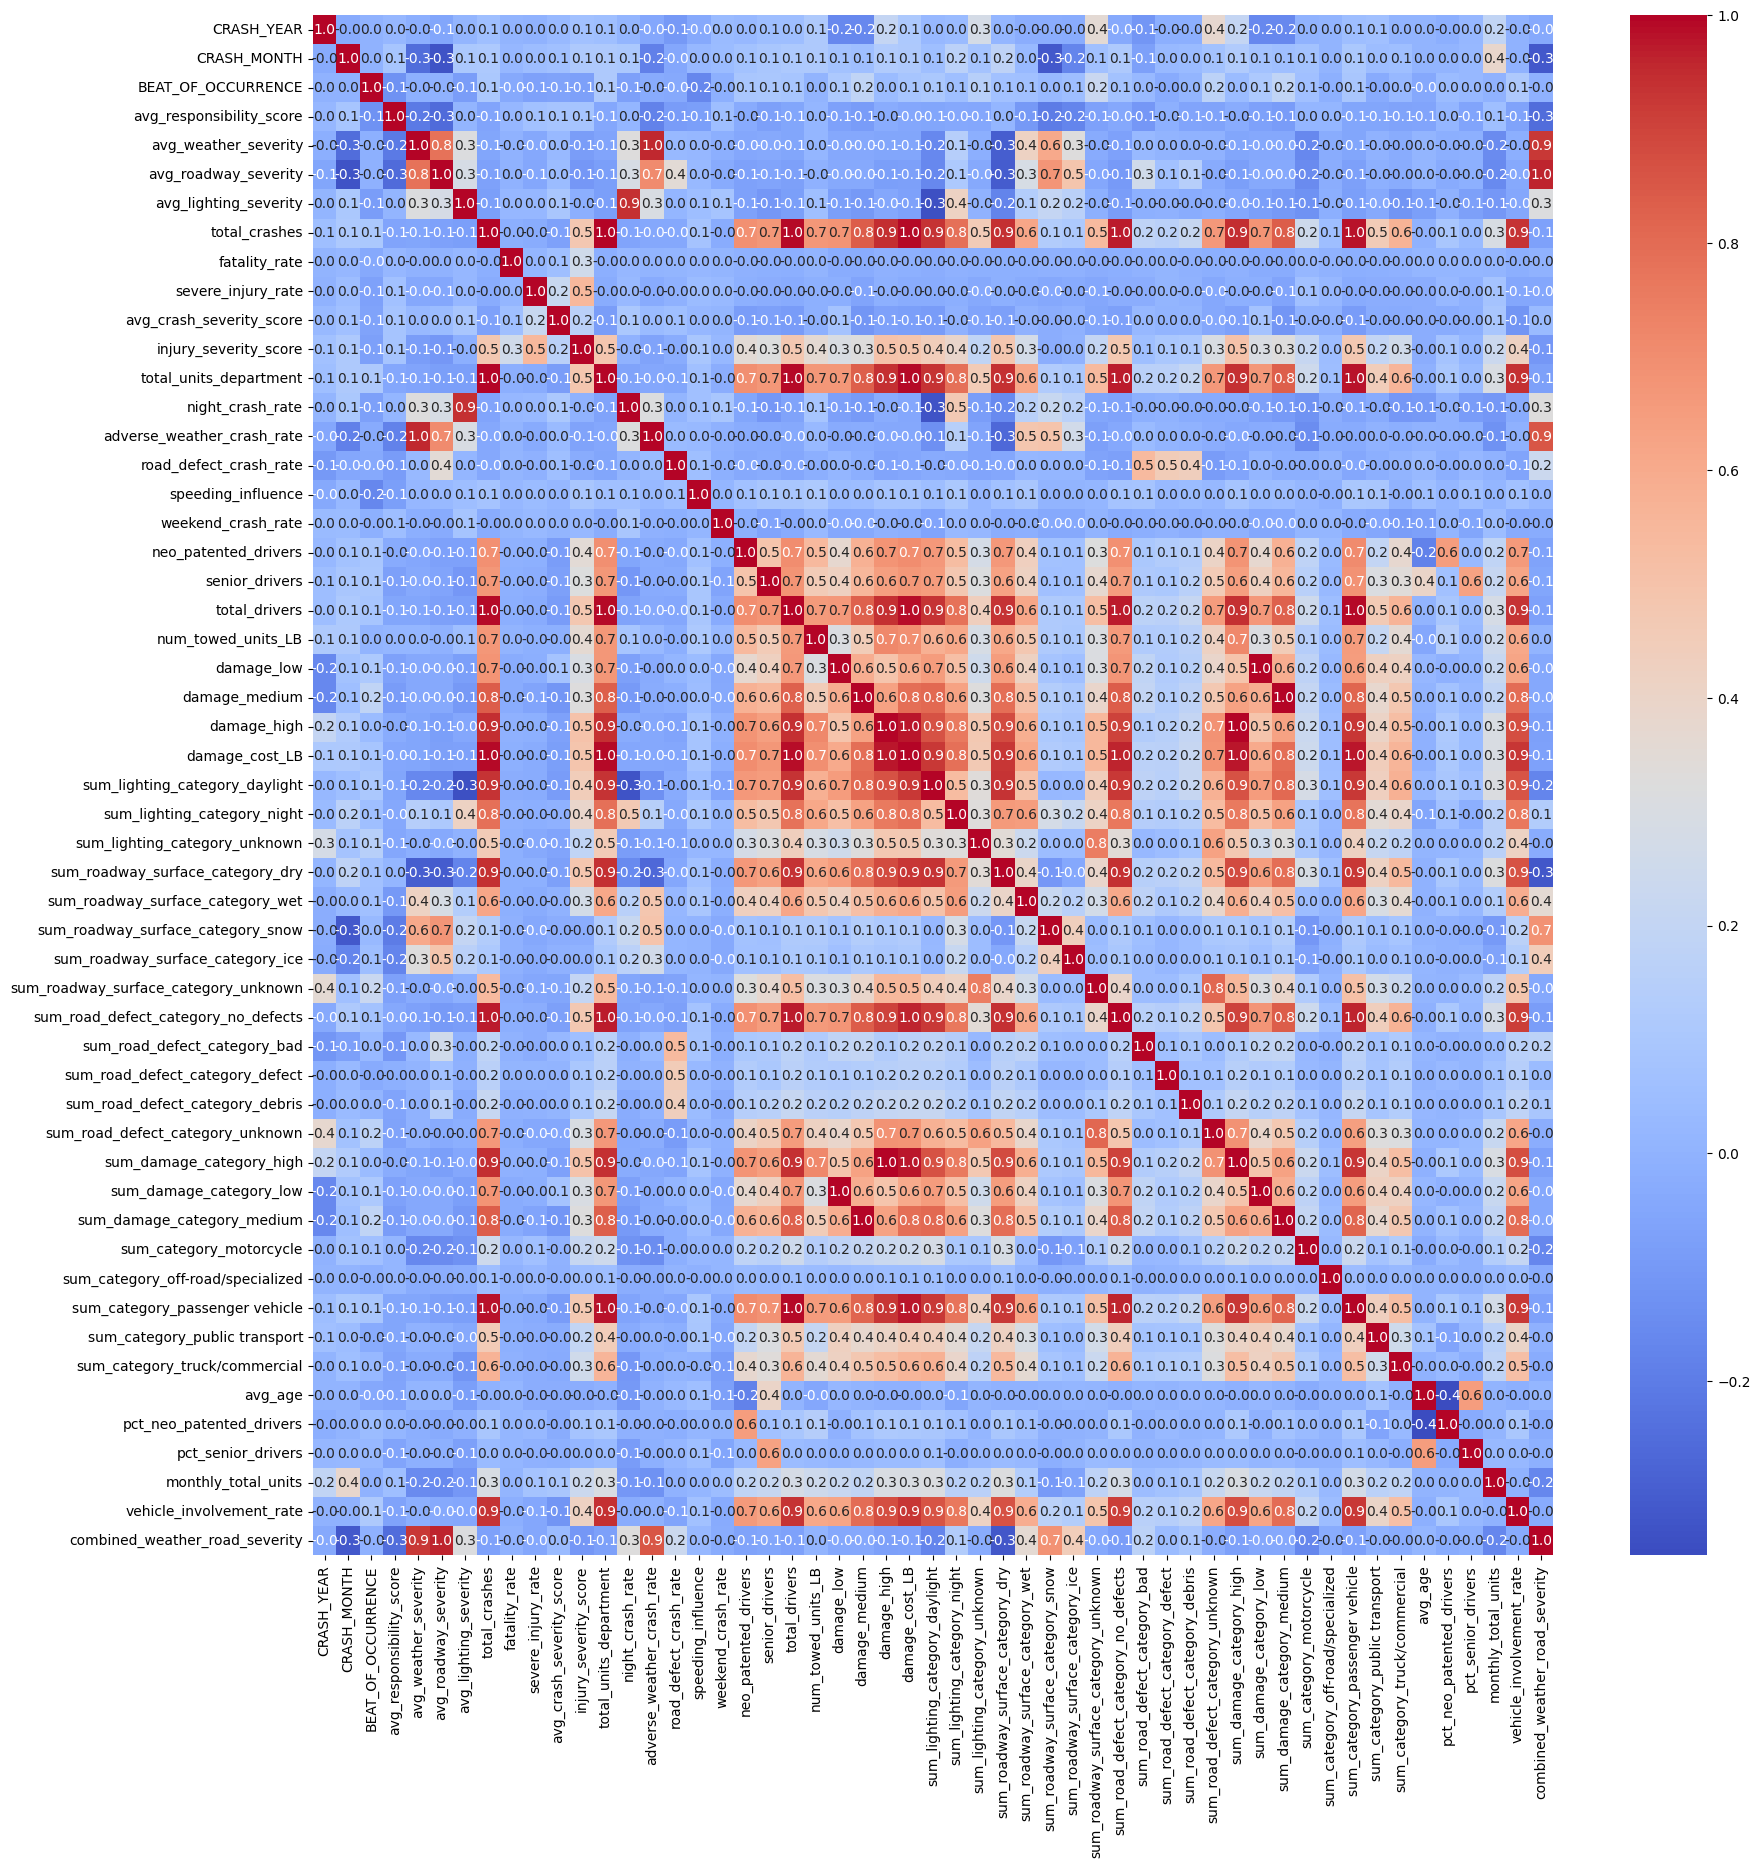

In [22]:
# plot correlation matric for incident_profile
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(incident_profile.corr(), annot=True, fmt=".1f", cmap='coolwarm')
plt.show()




---

# first quick correlation analisys

In [23]:
# columns to analize

columns = ['avg_age', 'avg_responsibility_score', 'avg_weather_severity', 'combined_weather_road_severity',
           'avg_roadway_severity', 'avg_lighting_severity', 'total_crashes', 'fatality_rate',
           'severe_injury_rate', 'avg_crash_severity_score', 'injury_severity_score', 'vehicle_involvement_rate',
           'night_crash_rate', 'adverse_weather_crash_rate', 'road_defect_crash_rate', 'speeding_influence',
           'weekend_crash_rate', 'neo_patented_drivers', 'senior_drivers', 'num_towed_units_LB', 'damage_low','damage_medium', 
           'damage_high', 'damage_cost_LB', 'pct_neo_patented_drivers', 'pct_senior_drivers']

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

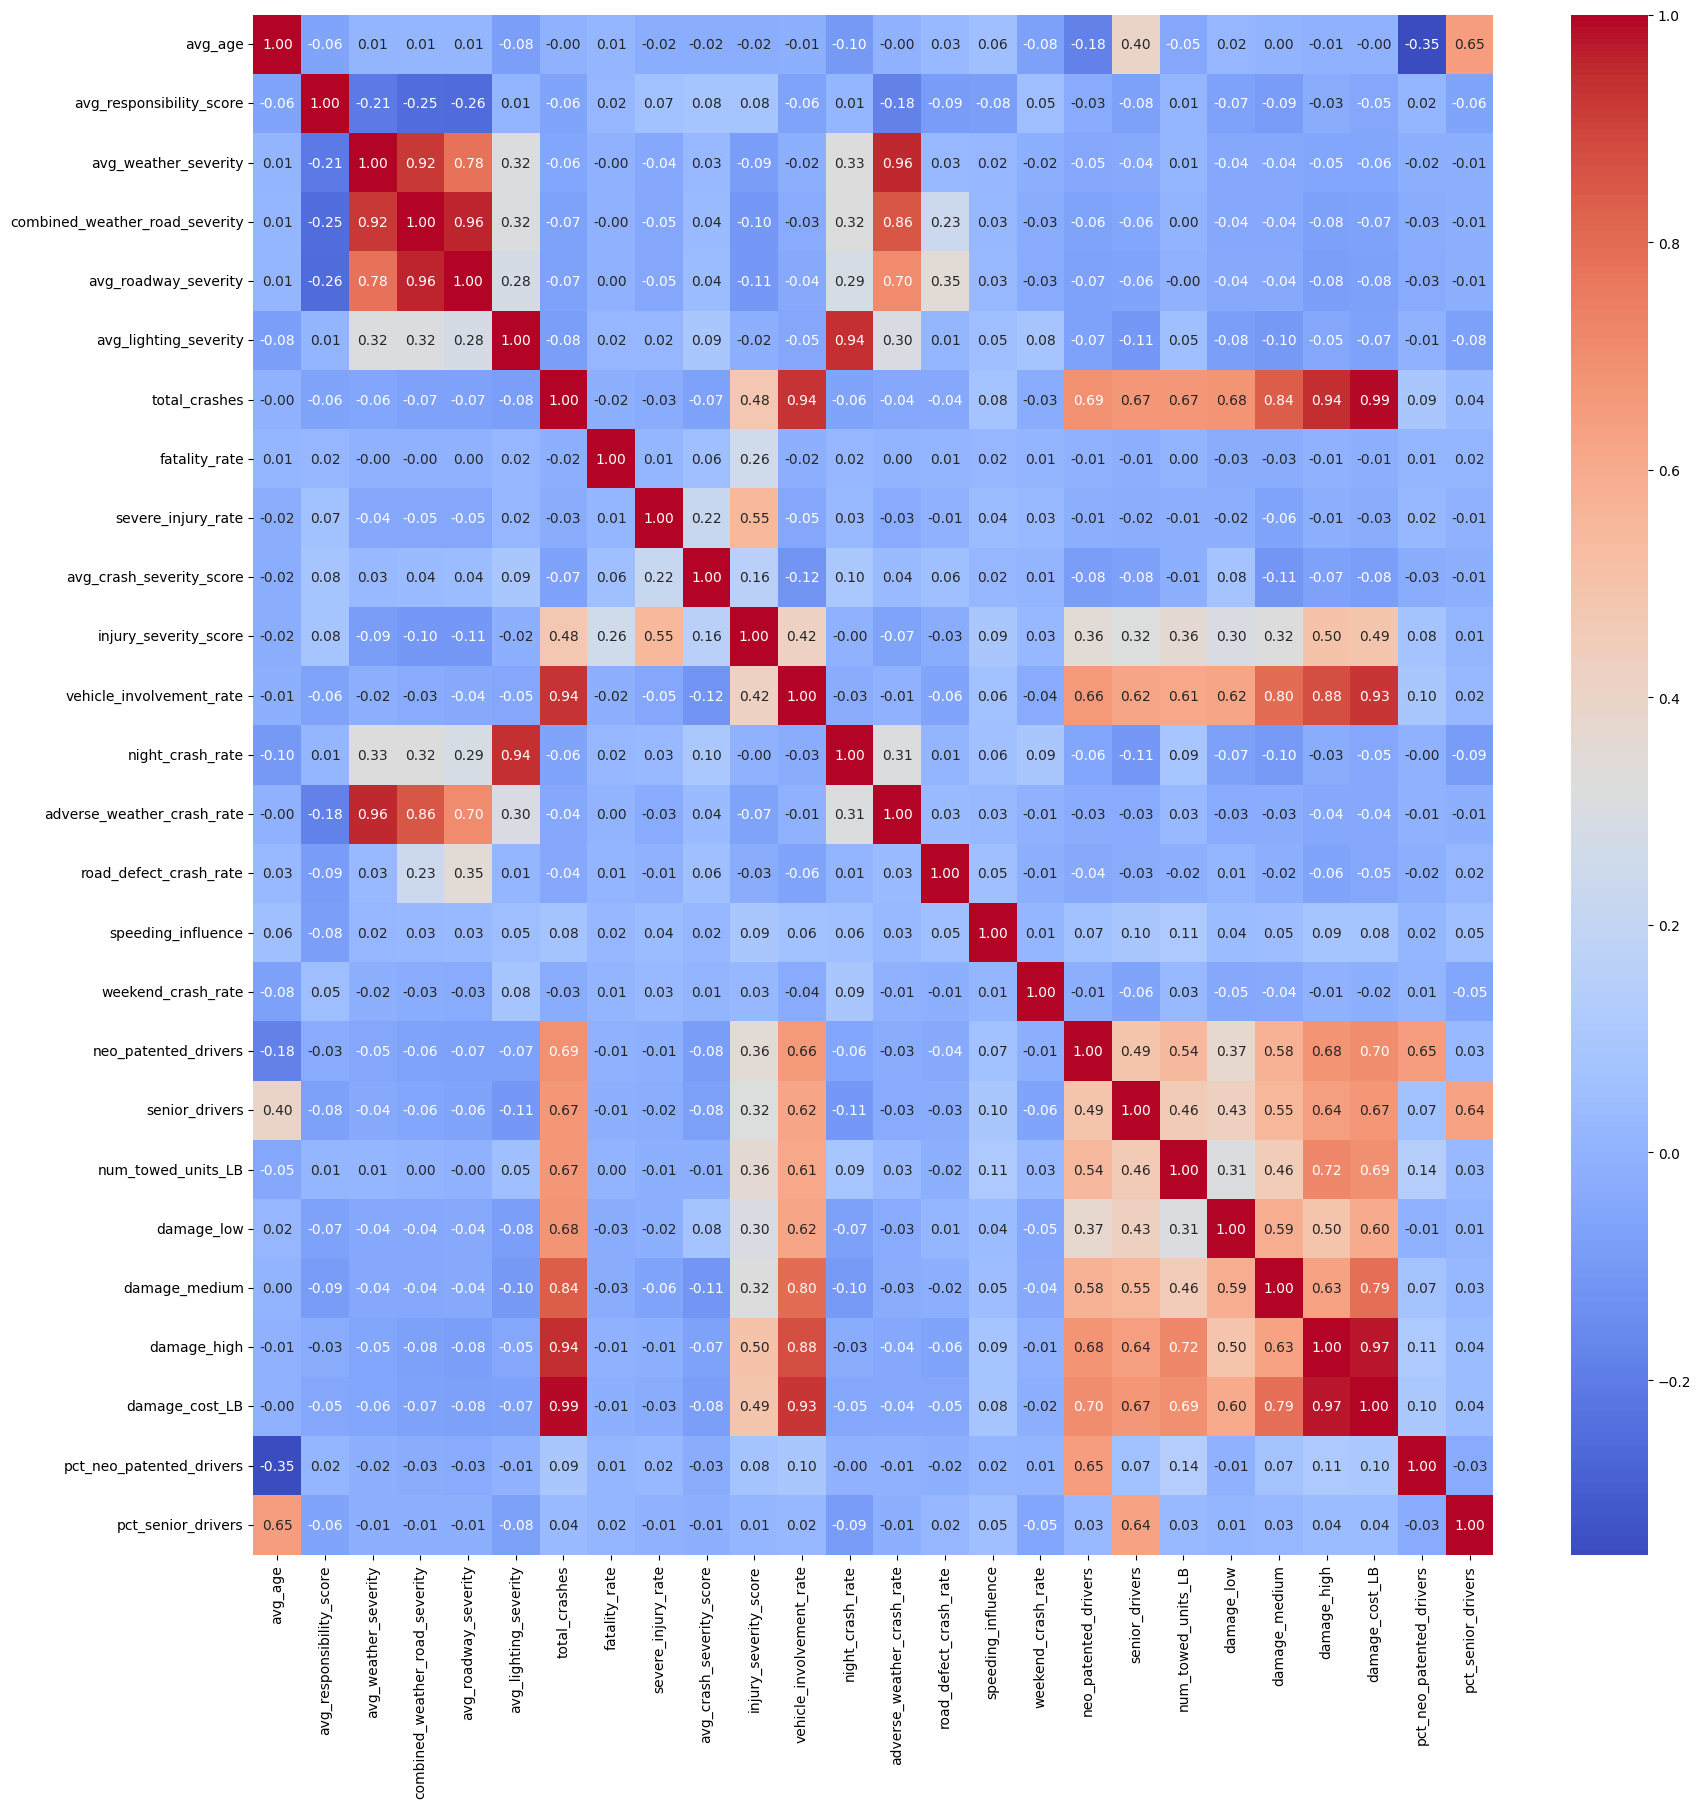

In [25]:
plt.figure(figsize=(20, 20))
sns.heatmap(incident_profile[columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

---

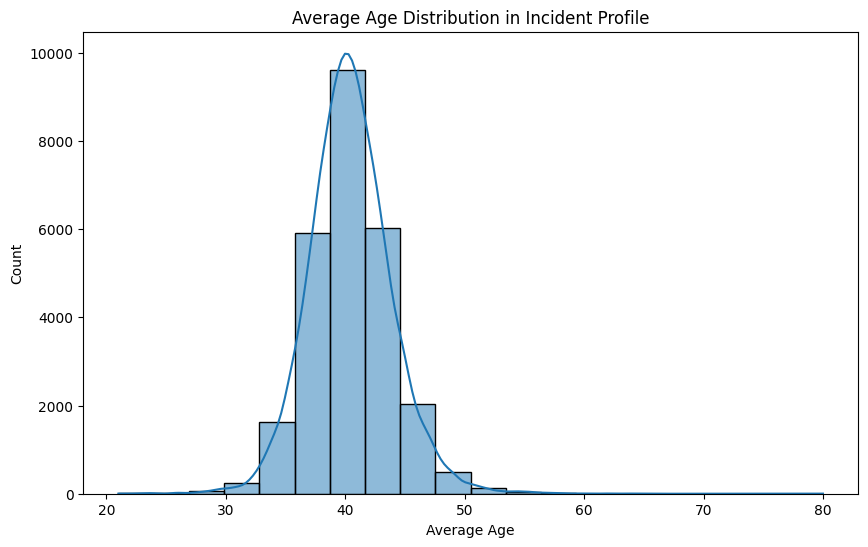

In [26]:
# age distribution for incident profile
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_age"], bins=20, kde=True)
plt.title("Average Age Distribution in Incident Profile")
plt.xlabel("Average Age")
plt.ylabel("Count")
plt.show()


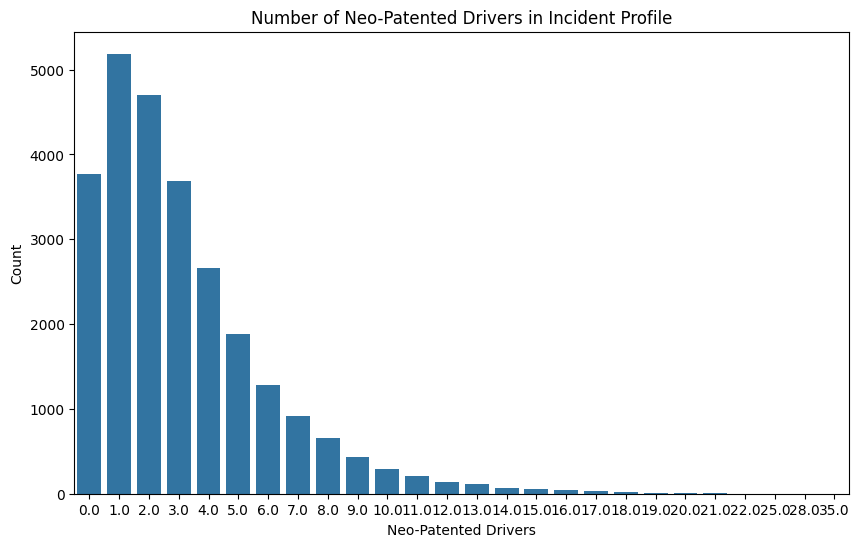

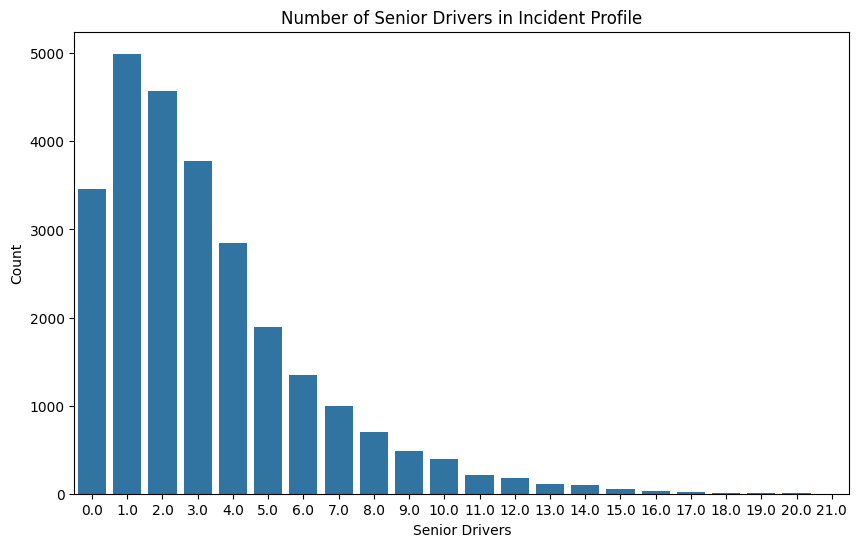

In [27]:
# number of neo-patented drivers and senior drivers
plt.figure(figsize=(10, 6))
sns.countplot(data=incident_profile, x="neo_patented_drivers")
plt.title("Number of Neo-Patented Drivers in Incident Profile")
plt.xlabel("Neo-Patented Drivers")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=incident_profile, x="senior_drivers")
plt.title("Number of Senior Drivers in Incident Profile")
plt.xlabel("Senior Drivers")
plt.ylabel("Count")
plt.show()


---

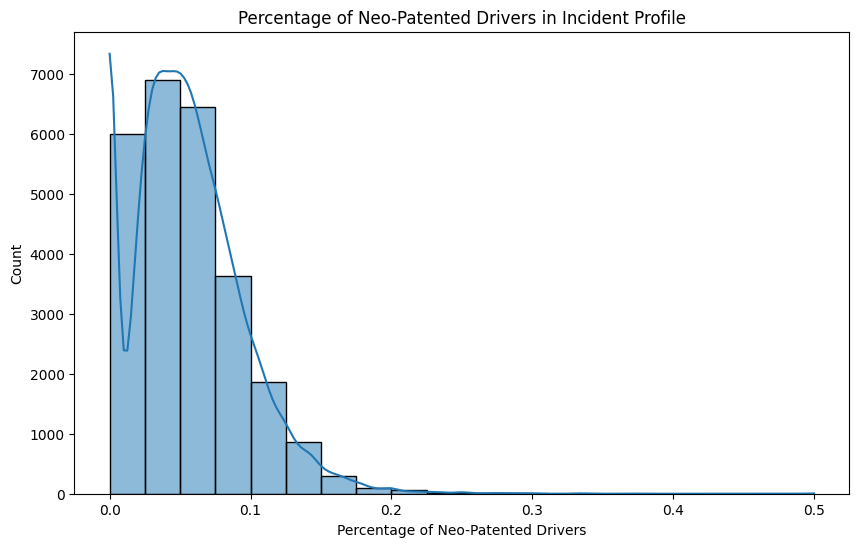

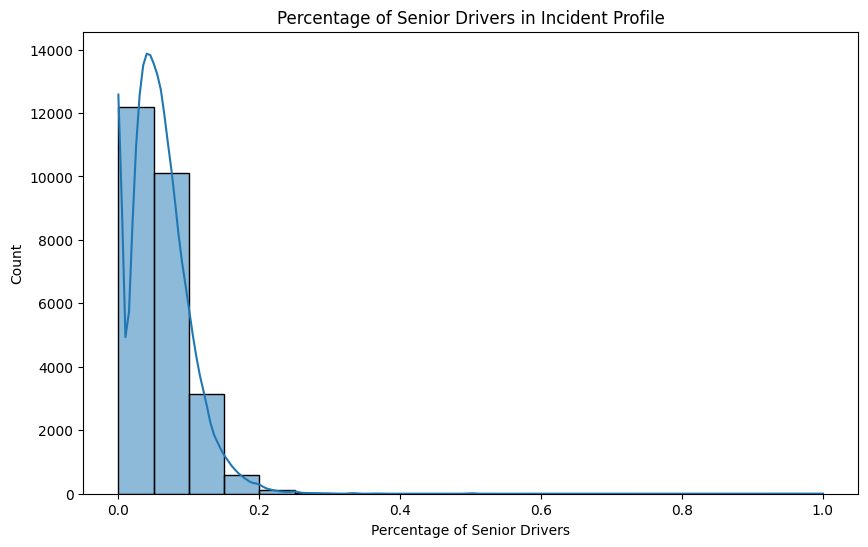

In [28]:
# distribution of pct_neo_patented_drivers and pct_senior_drivers
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["pct_neo_patented_drivers"], bins=20, kde=True)
plt.title("Percentage of Neo-Patented Drivers in Incident Profile")
plt.xlabel("Percentage of Neo-Patented Drivers")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["pct_senior_drivers"], bins=20, kde=True)
plt.title("Percentage of Senior Drivers in Incident Profile")
plt.xlabel("Percentage of Senior Drivers")
plt.ylabel("Count")
plt.show()


Text(0, 0.5, 'Count')

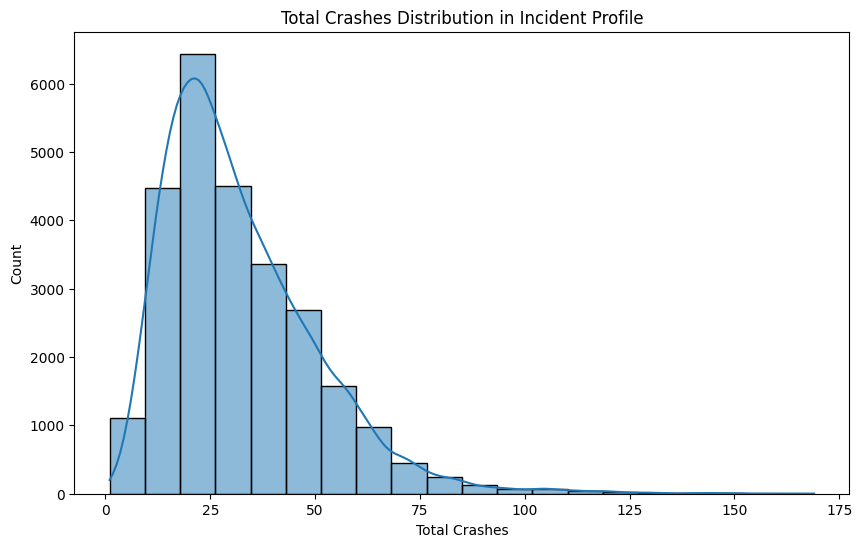

In [29]:
# total crashes distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["total_crashes"], bins=20, kde=True)
plt.title("Total Crashes Distribution in Incident Profile")
plt.xlabel("Total Crashes")
plt.ylabel("Count")

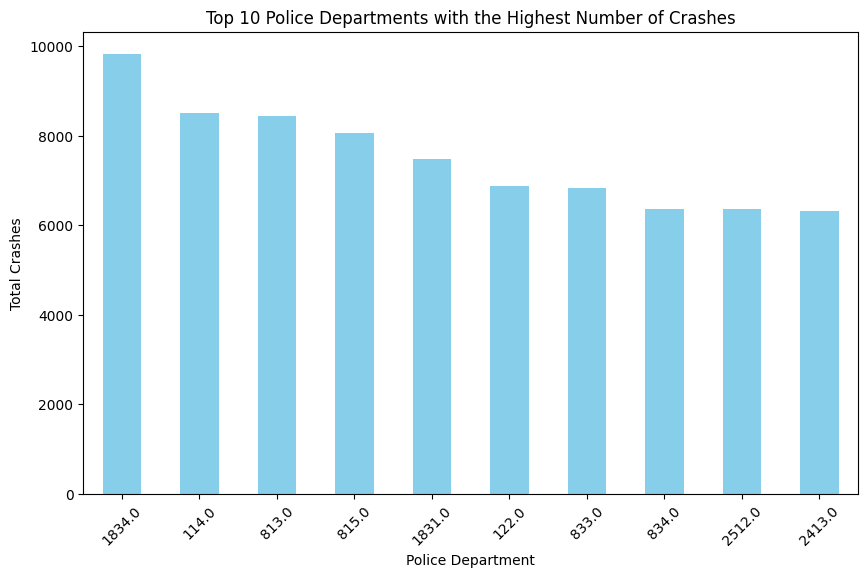

In [30]:
# top 10 police departments with the highest number of crashes
top_police_departments = incident_profile.groupby("BEAT_OF_OCCURRENCE")["total_crashes"].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_police_departments.plot(kind="bar", color="skyblue")
plt.title("Top 10 Police Departments with the Highest Number of Crashes")
plt.xlabel("Police Department")
plt.ylabel("Total Crashes")
plt.xticks(rotation=45)
plt.show()


C:\Users\chucki\AppData\Local\Temp\ipykernel_1176\1614737875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="BEAT_OF_OCCURRENCE", y="avg_age", palette="coolwarm")


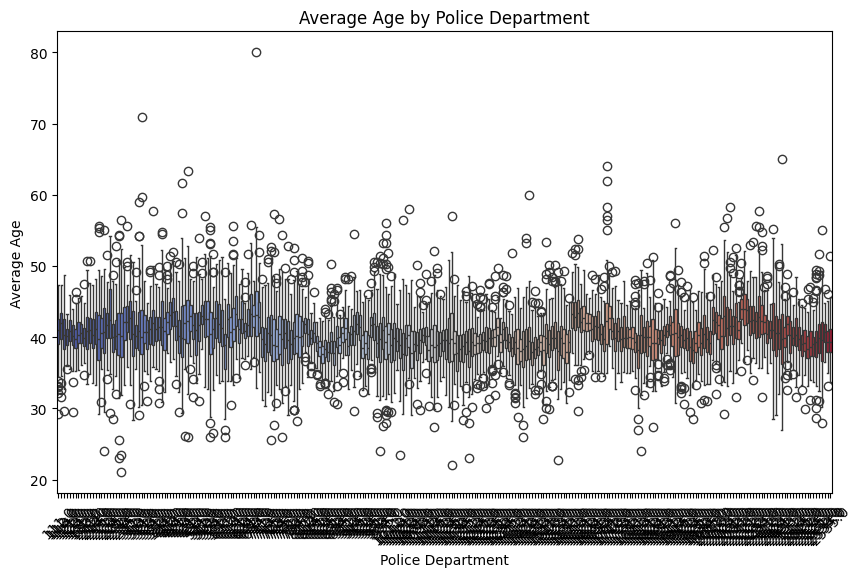

In [31]:
# boxplot for average age by police department
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="BEAT_OF_OCCURRENCE", y="avg_age", palette="coolwarm")
plt.title("Average Age by Police Department")
plt.xlabel("Police Department")
plt.ylabel("Average Age")
plt.xticks(rotation=45)
plt.show()


In [32]:
# isolation tree for anomaly detection
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

# Selecting features for anomaly detection
features = [
    "avg_age"
]

# Splitting the data into training and testing sets
X_train, X_test = train_test_split(incident_profile[features], test_size=0.2, random_state=42)

# Training the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(X_train)

# Predicting anomalies
anomalies = isolation_forest.predict(X_test)
anomalies = pd.Series(anomalies).replace({1: 0, -1: 1})

# Displaying the number of anomalies
anomalies.value_counts()


0    5194
1      43
Name: count, dtype: int64

In [33]:
# Displaying the anomalies
anomalies_df = X_test.copy()
anomalies_df["anomaly"] = anomalies
anomalies_df[anomalies_df["anomaly"] == 1]


,avg_age,anomaly
3739,41.166667,1.0
520,50.333333,1.0
482,40.333333,1.0
2583,38.053333,1.0
2004,41.829268,1.0
121,34.153846,1.0
2698,41.706767,1.0


---

## Main distribution, dataset initial analisys

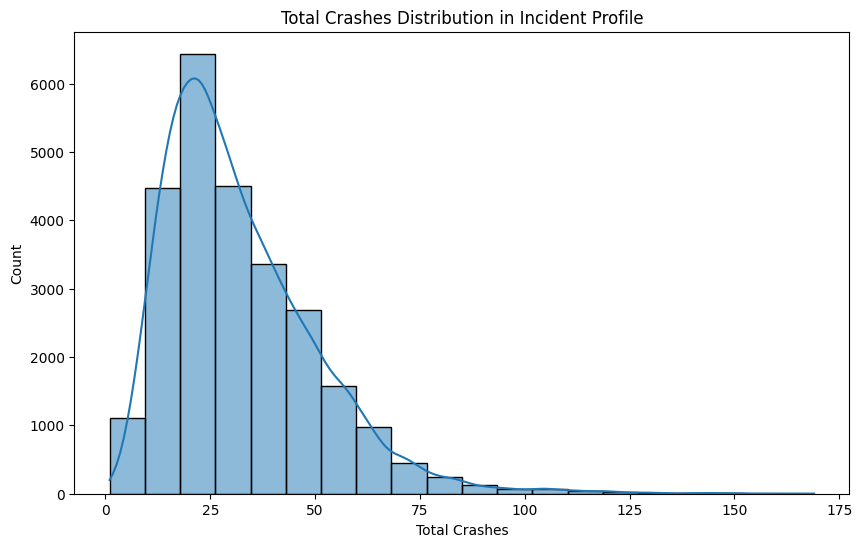

In [34]:
# total_crashes
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["total_crashes"], bins=20, kde=True)
plt.title("Total Crashes Distribution in Incident Profile")
plt.xlabel("Total Crashes")
plt.ylabel("Count")
plt.show()

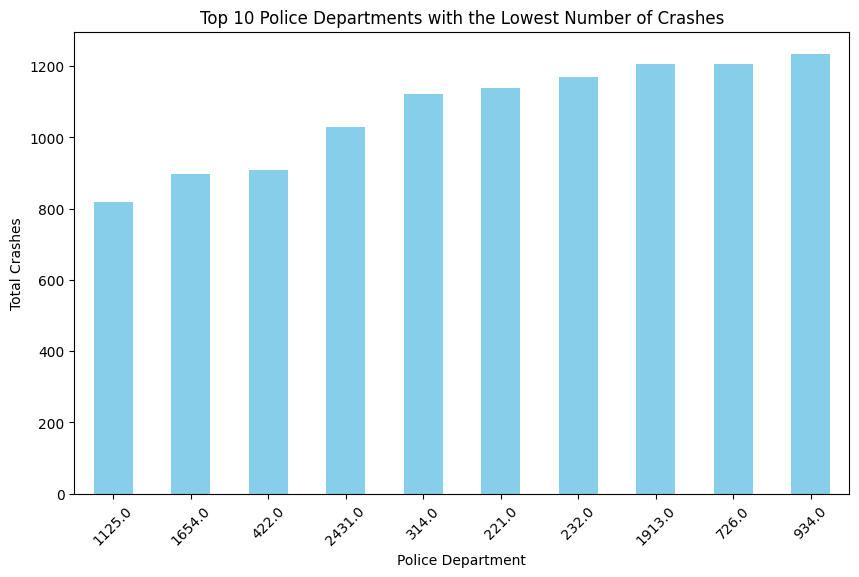

In [35]:
# top 10 police departments with the lowest number of crashes
bottom_police_departments = incident_profile.groupby("BEAT_OF_OCCURRENCE")["total_crashes"].sum().nsmallest(10)
plt.figure(figsize=(10, 6))

bottom_police_departments.plot(kind="bar", color="skyblue")
plt.title("Top 10 Police Departments with the Lowest Number of Crashes")
plt.xlabel("Police Department")
plt.ylabel("Total Crashes")
plt.xticks(rotation=45)
plt.show()

In [36]:
# police department with less than 10 crashes in a month
low_crash_police_departments = incident_profile[incident_profile["total_crashes"] < 2]
len(low_crash_police_departments)

18

In [37]:
low_crash_police_departments.head(20)

,CRASH_YEAR,CRASH_MONTH,BEAT_OF_OCCURRENCE,avg_responsibility_score,avg_weather_severity,avg_roadway_severity,avg_lighting_severity,total_crashes,fatality_rate,severe_injury_rate,avg_crash_severity_score,injury_severity_score,total_units_department,night_crash_rate,adverse_weather_crash_rate,road_defect_crash_rate,speeding_influence,weekend_crash_rate,neo_patented_drivers,senior_drivers,total_drivers,num_towed_units_LB,damage_low,damage_medium,damage_high,damage_cost_LB,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial,avg_age,pct_neo_patented_drivers,pct_senior_drivers,monthly_total_units,vehicle_involvement_rate,combined_weather_road_severity
113,2017,1,933.0,NaN,3.0,0.0,0.0,1,0.0,0.0,0.013789,0.0,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,1,1500,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,2.0,0.0,0.0,41.0,0.0,0.0,8378,0.000239,1.2
191,2017,1,1654.0,0.6,0.0,0.0,0.0,1,0.0,0.0,0.023266,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,1,1500,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,2.0,0.0,0.0,46.0,0.0,0.0,8378,0.000239,0.0
286,2017,2,221.0,NaN,0.0,0.0,1.0,1,0.0,0.0,0.047259,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,1,1500,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,2.0,0.0,0.0,34.0,0.0,0.0,7988,0.000250,0.0
292,2017,2,232.0,0.6,1.0,0.0,2.0,1,0.0,0.0,0.013789,0.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0,0,1,1500,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,23.5,0.5,0.0,7988,0.000250,0.4
339,2017,2,633.0,NaN,0.0,NaN,1.0,1,0.0,0.0,0.023266,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0,0,0,1,1500,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0.0,0.0,1.0,0.0,0.0,80.0,0.0,0.5,7988,0.000250,NaN
662,2017,3,1024.0,NaN,0.0,0.0,0.0,1,0.0,0.0,0.018063,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,1000,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,9893,0.000202,0.0
830,2017,4,232.0,NaN,0.0,NaN,2.0,1,0.0,0.0,0.023266,0.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0,1,0,1000,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.0,0.0,2.0,0.0,0.0,21.0,0.5,0.0,9781,0.000204,NaN
921,2017,4,933.0,NaN,0.0,NaN,2.0,1,0.0,0.0,0.018063,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,1500,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,9781,0.000204,NaN
1268,2017,5,1654.0,0.6,0.0,0.0,2.0,1,0.0,0.0,0.023266,0.0,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,0,1,1500,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,2.0,0.0,0.0,48.0,0.0,0.0,11406,0.000175,0.0
1538,2017,6,1654.0,0.6,0.0,0.0,0.0,1,0.0,0.0,0.023266,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,1,1500,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,2.0,0.0,0.0,38.0,0.0,0.0,12239,0.000163,0.0


In [38]:
incident_profile["total_crashes"].quantile(0.05)

np.float64(10.0)

In [39]:
# get the 5% of police departments with the lowest number of crashes using the incident profile
low_crash_police_departments = incident_profile[incident_profile["total_crashes"] < incident_profile["total_crashes"].quantile(0.05)]
len(low_crash_police_departments)


1107

In [40]:
incident_profile_test = incident_profile[incident_profile["total_crashes"] >= incident_profile["total_crashes"].quantile(0.05)]

In [41]:
incident_profile_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25078 entries, 0 to 26184
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CRASH_YEAR                            25078 non-null  int64  
 1   CRASH_MONTH                           25078 non-null  int64  
 2   BEAT_OF_OCCURRENCE                    25078 non-null  float64
 3   avg_responsibility_score              25075 non-null  float64
 4   avg_weather_severity                  25078 non-null  float64
 5   avg_roadway_severity                  25078 non-null  float64
 6   avg_lighting_severity                 25078 non-null  float64
 7   total_crashes                         25078 non-null  int64  
 8   fatality_rate                         25078 non-null  float64
 9   severe_injury_rate                    25078 non-null  float64
 10  avg_crash_severity_score              25078 non-null  float64
 11  injury_severity_scor

no missing values this way...

In [42]:
low_crash_police_departments['BEAT_OF_OCCURRENCE'].value_counts()

BEAT_OF_OCCURRENCE
1125.0    64
422.0     51
2431.0    41
1654.0    40
314.0     29
          ..
1921.0     1
2012.0     1
1922.0     1
334.0      1
735.0      1
Name: count, Length: 159, dtype: int64

In [43]:
# subset of incident profile with the departments in the low_crash_police_departments 
incident_profile_low_crash = incident_profile[incident_profile['BEAT_OF_OCCURRENCE'].isin(low_crash_police_departments['BEAT_OF_OCCURRENCE'])]

incident_profile_low_crash['BEAT_OF_OCCURRENCE'].value_counts()


BEAT_OF_OCCURRENCE
111.0     97
112.0     97
113.0     97
121.0     97
132.0     97
          ..
2524.0    97
2532.0    97
2531.0    97
2535.0    97
1654.0    92
Name: count, Length: 159, dtype: int64

Incident Profile Crash Counts (Total):
BEAT_OF_OCCURRENCE
111.0    97
112.0    97
113.0    97
114.0    97
121.0    97
dtype: int64

5th percentile threshold (total crashes): 97.0

Departments in the bottom 5% (by total crashes): [111.0, 112.0, 113.0, 114.0, 121.0, 122.0, 123.0, 124.0, 131.0, 132.0, 133.0, 211.0, 212.0, 213.0, 214.0, 215.0, 221.0, 222.0, 223.0, 224.0, 225.0, 231.0, 232.0, 233.0, 234.0, 235.0, 311.0, 312.0, 313.0, 314.0, 321.0, 322.0, 323.0, 324.0, 331.0, 332.0, 333.0, 334.0, 411.0, 412.0, 413.0, 414.0, 421.0, 422.0, 423.0, 424.0, 431.0, 432.0, 433.0, 434.0, 511.0, 512.0, 513.0, 522.0, 523.0, 524.0, 531.0, 532.0, 533.0, 611.0, 612.0, 613.0, 614.0, 621.0, 622.0, 623.0, 624.0, 631.0, 632.0, 633.0, 634.0, 711.0, 712.0, 713.0, 714.0, 715.0, 722.0, 723.0, 724.0, 725.0, 726.0, 731.0, 732.0, 733.0, 734.0, 735.0, 811.0, 812.0, 813.0, 814.0, 815.0, 821.0, 822.0, 823.0, 824.0, 825.0, 831.0, 832.0, 833.0, 834.0, 835.0, 911.0, 912.0, 913.0, 914.0, 915.0, 921.0, 922.0, 923.0, 924.0, 

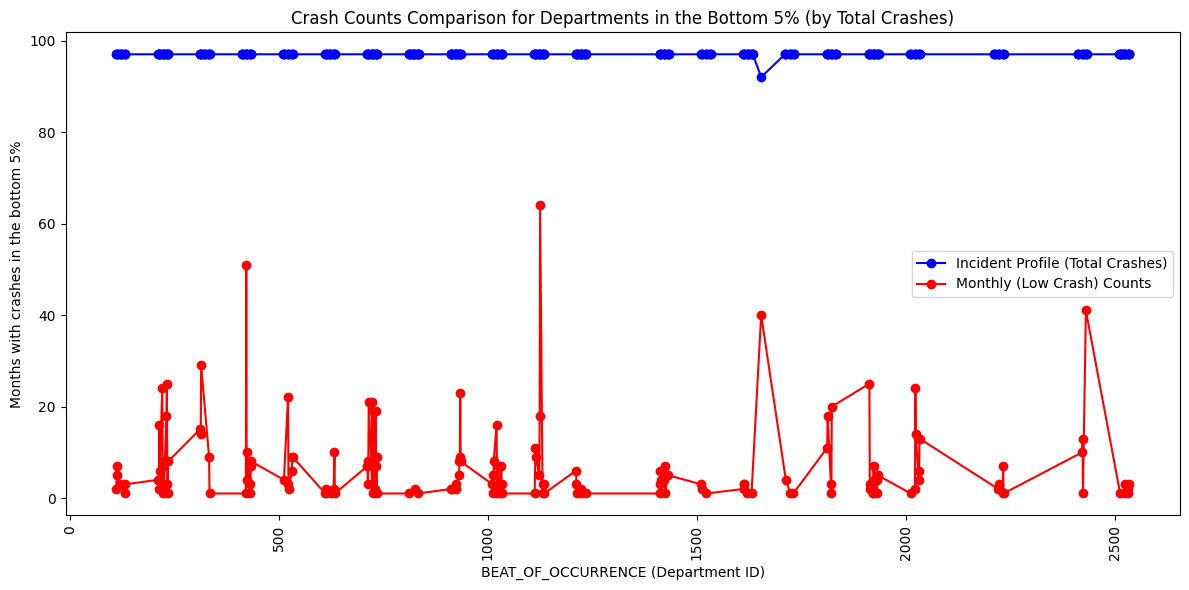

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Compute total crashes per department from incident_profile ---
# Each row is assumed to be one crash.
incident_counts = incident_profile.groupby('BEAT_OF_OCCURRENCE').size()
incident_counts = incident_counts.sort_index()  # sort by department ID for plotting
print("Incident Profile Crash Counts (Total):")
print(incident_counts.head())

# --- 2. Compute the 5th percentile threshold based on total number of crashes ---
threshold = incident_counts.quantile(0.05)
print("\n5th percentile threshold (total crashes):", threshold)

# --- 3. Identify departments in the bottom 5% (by total number of crashes) ---
bottom_depts = incident_counts[incident_counts <= threshold].index
print("\nDepartments in the bottom 5% (by total crashes):", list(bottom_depts))

# --- 4. Get monthly counts from low_crash_police_departments for all departments ---
# (Here, each row in low_crash_police_departments represents one crash.)
monthly_counts = low_crash_police_departments['BEAT_OF_OCCURRENCE'].value_counts().sort_index()
print("\nMonthly Counts (from low_crash_police_departments):")
print(monthly_counts.head())

# Get the monthly counts for only the bottom departments
monthly_bottom_counts = monthly_counts[monthly_counts.index.isin(bottom_depts)]

# Also, extract the corresponding incident_profile counts for these departments
incident_bottom_counts = incident_counts[incident_counts.index.isin(bottom_depts)]

# --- 5. Plot the two lines ---
plt.figure(figsize=(12, 6))

# Plot the overall counts from incident_profile (usually higher)
plt.plot(incident_bottom_counts.index, incident_bottom_counts.values, 
         marker='o', linestyle='-', color='blue',
         label='Incident Profile (Total Crashes)')

# Plot the monthly counts from low_crash_police_departments
plt.plot(monthly_bottom_counts.index, monthly_bottom_counts.values, 
         marker='o', linestyle='-', color='red',
         label='Monthly (Low Crash) Counts')

plt.xlabel('BEAT_OF_OCCURRENCE (Department ID)')
plt.ylabel('Months with crashes in the bottom 5%')
plt.title('Crash Counts Comparison for Departments in the Bottom 5% (by Total Crashes)')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [45]:
import pandas as pd

def flag_outliers_iqr(group, multiplier=1.5):
    # Compute Q1 and Q3 for the crash counts in this department
    q1 = group['total_crashes'].quantile(0.15)
    q3 = group['total_crashes'].quantile(0.85)
    iqr = q3 - q1
    
    # Define lower and upper bounds
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    
    # Flag as outlier if crash_count is outside the bounds.
    group['is_outlier'] = (group['total_crashes'] < lower_bound) | (group['total_crashes'] > upper_bound)
    
    # Optionally, store the bounds for inspection
    group['lower_bound'] = lower_bound
    group['upper_bound'] = upper_bound
    return group

# Apply this function groupwise (by department)
incident_profile_flagged = incident_profile.groupby('BEAT_OF_OCCURRENCE').apply(flag_outliers_iqr)

# Now, incident_profile_flagged contains a Boolean column 'is_outlier'
# You can inspect the flagged entries:
outliers_iqr = incident_profile_flagged[incident_profile_flagged['is_outlier']]
print(len(outliers_iqr))
outliers_iqr[['BEAT_OF_OCCURRENCE', 'CRASH_YEAR', 'CRASH_MONTH', 'total_crashes', 'is_outlier', 'lower_bound', 'upper_bound']].head()


10


C:\Users\chucki\AppData\Local\Temp\ipykernel_1176\3966226512.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  incident_profile_flagged = incident_profile.groupby('BEAT_OF_OCCURRENCE').apply(flag_outliers_iqr)


,,BEAT_OF_OCCURRENCE,CRASH_YEAR,CRASH_MONTH,total_crashes,is_outlier,lower_bound,upper_bound
BEAT_OF_OCCURRENCE,,,,,,,,
713.0,11678,713.0,2020,8,40,True,-1.0,39.0
1031.0,663,1031.0,2017,3,8,True,9.0,81.0
1034.0,397,1034.0,2017,2,8,True,10.1,92.5
1115.0,11467,1115.0,2020,7,39,True,-5.5,38.5
1132.0,12014,1132.0,2020,9,51,True,-1.5,50.5


In [46]:
import pandas as pd
from scipy.stats import zscore

def flag_outliers_zscore(group, threshold=3):
    # Calculate the z-scores for the crash counts in this department.
    # zscore() returns a numpy array of the same length as the group.
    group['zscore'] = zscore(group['total_crashes'])
    
    # Flag as outlier if the absolute z-score exceeds the threshold.
    group['is_outlier'] = group['zscore'].abs() > threshold
    return group

# Apply the function groupwise
incident_profile_flagged = incident_profile.groupby('BEAT_OF_OCCURRENCE').apply(flag_outliers_zscore)

# Inspect outliers:
outliers_z = incident_profile_flagged[incident_profile_flagged['is_outlier']]
print(len(outliers_z))
outliers_z[outliers_z['zscore'] < 0][['BEAT_OF_OCCURRENCE', 'CRASH_YEAR', 'CRASH_MONTH', 'total_crashes', 'is_outlier', 'zscore']].head()


82


C:\Users\chucki\AppData\Local\Temp\ipykernel_1176\1004325707.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  incident_profile_flagged = incident_profile.groupby('BEAT_OF_OCCURRENCE').apply(flag_outliers_zscore)


,,BEAT_OF_OCCURRENCE,CRASH_YEAR,CRASH_MONTH,total_crashes,is_outlier,zscore
BEAT_OF_OCCURRENCE,,,,,,,
222.0,287,222.0,2017,2,4,True,-3.039261
431.0,854,431.0,2017,4,7,True,-3.098315
511.0,320,511.0,2017,2,18,True,-3.045609
523.0,324,523.0,2017,2,3,True,-3.246667
633.0,339,633.0,2017,2,1,True,-3.143032


In [47]:
outliers_z['total_crashes'].value_counts().sort_index()

total_crashes
1     1
3     2
4     4
5     2
6     2
7     5
8     2
9     1
11    2
12    1
13    1
18    1
19    2
21    1
22    1
23    1
24    1
25    2
27    1
28    1
29    1
32    2
34    2
35    1
36    2
38    2
39    1
40    3
41    6
42    1
43    1
45    2
46    1
47    1
48    2
49    2
50    1
51    2
52    1
53    1
54    1
55    1
56    1
57    1
59    1
64    1
70    2
71    1
76    1
77    1
82    1
90    1
Name: count, dtype: int64

In [48]:
# print BEAT_OF_OCCURENCE 633.0	YEAR 2017	MONTH 2 from incident_profile
incident_profile[(incident_profile['BEAT_OF_OCCURRENCE'] == 633.0)]

,CRASH_YEAR,CRASH_MONTH,BEAT_OF_OCCURRENCE,avg_responsibility_score,avg_weather_severity,avg_roadway_severity,avg_lighting_severity,total_crashes,fatality_rate,severe_injury_rate,avg_crash_severity_score,injury_severity_score,total_units_department,night_crash_rate,adverse_weather_crash_rate,road_defect_crash_rate,speeding_influence,weekend_crash_rate,neo_patented_drivers,senior_drivers,total_drivers,num_towed_units_LB,damage_low,damage_medium,damage_high,damage_cost_LB,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial,avg_age,pct_neo_patented_drivers,pct_senior_drivers,monthly_total_units,vehicle_involvement_rate,combined_weather_road_severity
69,2017,1,633.0,0.633333,0.125000,0.857143,0.375000,9,0.0,0.000000,0.043022,0.0,17,0.333333,0.000000,0.000000,0.111111,0.333333,0.0,2.0,16.0,1,2,2,5,10500,5,3,1,6,0,0,2,1,7,0,0,0,2,5,2,2,0.0,0.0,10.0,0.0,0.0,43.000000,0.000000,0.125000,8378,0.002029,0.564286
339,2017,2,633.0,NaN,0.000000,NaN,1.000000,1,0.0,0.000000,0.023266,0.0,2,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,2.0,0,0,0,1,1500,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0.0,0.0,1.0,0.0,0.0,80.000000,0.000000,0.500000,7988,0.000250,NaN
608,2017,3,633.0,0.633333,0.000000,0.000000,0.333333,9,0.0,0.000000,0.093218,0.0,18,0.333333,0.000000,0.000000,0.111111,0.222222,0.0,0.0,13.0,1,2,2,5,10500,6,3,0,9,0,0,0,0,8,0,0,0,1,5,2,2,0.0,0.0,8.0,0.0,1.0,46.333333,0.000000,0.000000,9893,0.001819,0.000000
877,2017,4,633.0,0.550000,0.375000,0.666667,0.250000,8,0.0,0.000000,0.038889,0.0,16,0.250000,0.125000,0.125000,0.125000,0.000000,1.0,1.0,14.0,2,3,2,3,8000,6,2,0,7,1,0,0,0,5,1,0,0,2,3,3,2,0.0,0.0,11.0,0.0,1.0,48.888889,0.071429,0.071429,9781,0.001636,0.550000
1146,2017,5,633.0,0.625000,0.250000,0.125000,0.250000,9,0.0,0.000000,0.046877,0.0,17,0.111111,0.111111,0.000000,0.111111,0.111111,1.0,2.0,15.0,0,2,5,2,9000,7,1,1,7,1,0,0,1,9,0,0,0,0,2,2,5,0.0,0.0,12.0,0.0,0.0,46.636364,0.066667,0.133333,11406,0.001490,0.175000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24904,2024,9,633.0,0.570000,0.157895,0.333333,0.631579,20,0.0,0.025000,0.091787,6.0,36,0.400000,0.050000,0.100000,0.050000,0.100000,1.0,1.0,27.0,2,3,2,15,26000,11,8,1,18,1,0,0,1,14,1,1,0,4,15,3,2,0.0,0.0,24.0,1.0,0.0,43.052632,0.037037,0.037037,19661,0.001831,0.263158
25174,2024,10,633.0,0.690909,0.375000,0.076923,0.533333,16,0.0,0.062500,0.070797,17.0,31,0.375000,0.187500,0.000000,0.000000,0.187500,1.0,0.0,26.0,4,3,2,11,20000,9,6,1,13,3,0,0,0,13,0,0,0,3,11,3,2,0.0,0.0,19.0,1.0,1.0,40.235294,0.038462,0.000000,19869,0.001560,0.196154
25444,2024,11,633.0,0.633333,0.461538,0.090909,0.571429,14,0.0,0.000000,0.040069,2.0,29,0.428571,0.142857,0.000000,0.000000,0.071429,0.0,3.0,23.0,1,1,2,11,19000,8,6,0,11,1,0,0,2,11,0,0,0,3,11,1,2,0.0,0.0,18.0,1.0,0.0,50.526316,0.000000,0.130435,17896,0.001620,0.239161
25714,2024,12,633.0,0.653846,0.400000,0.368421,0.857143,22,0.0,0.015152,0.063210,9.0,43,0.590909,0.136364,0.045455,0.045455,0.045455,2.0,3.0,35.0,4,3,3,16,28500,8,13,1,16,3,1,0,2,18,0,0,1,3,16,3,3,0.0,0.0,29.0,0.0,2.0,40.952381,0.057143,0.085714,17543,0.002451,0.381053


---

## distribution for SEVERITIES

### avg_responsibility_score

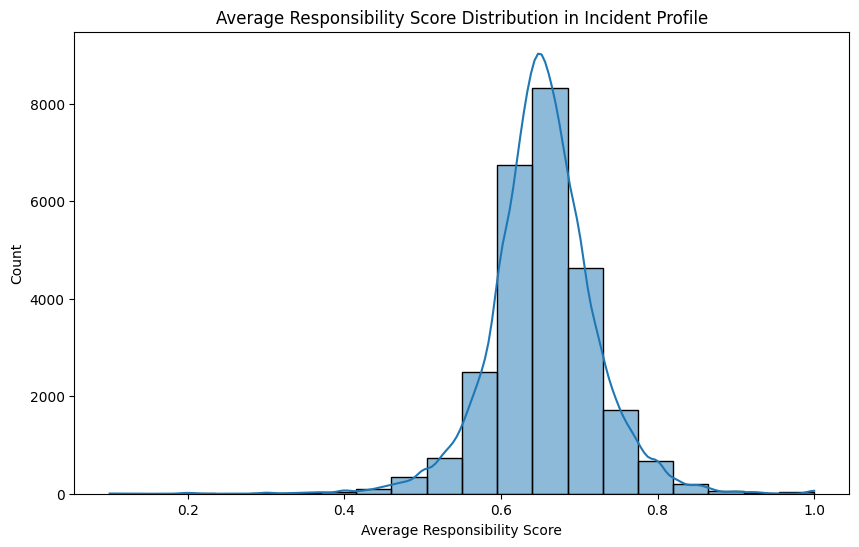

In [49]:
# distribution for avg_responsibility_score
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_responsibility_score"], bins=20, kde=True)
plt.title("Average Responsibility Score Distribution in Incident Profile")
plt.xlabel("Average Responsibility Score")
plt.ylabel("Count")
plt.show()


### avg_weather_severity

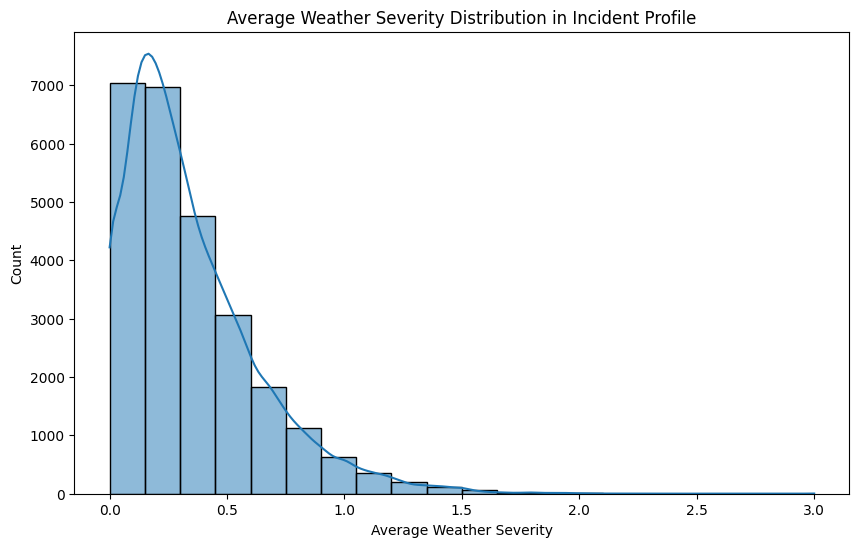

In [50]:
# distribution for avg_weather_severity
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_weather_severity"], bins=20, kde=True)
plt.title("Average Weather Severity Distribution in Incident Profile")
plt.xlabel("Average Weather Severity")
plt.ylabel("Count")
plt.show()


C:\Users\chucki\AppData\Local\Temp\ipykernel_1176\3525708444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="avg_weather_severity", palette="coolwarm")


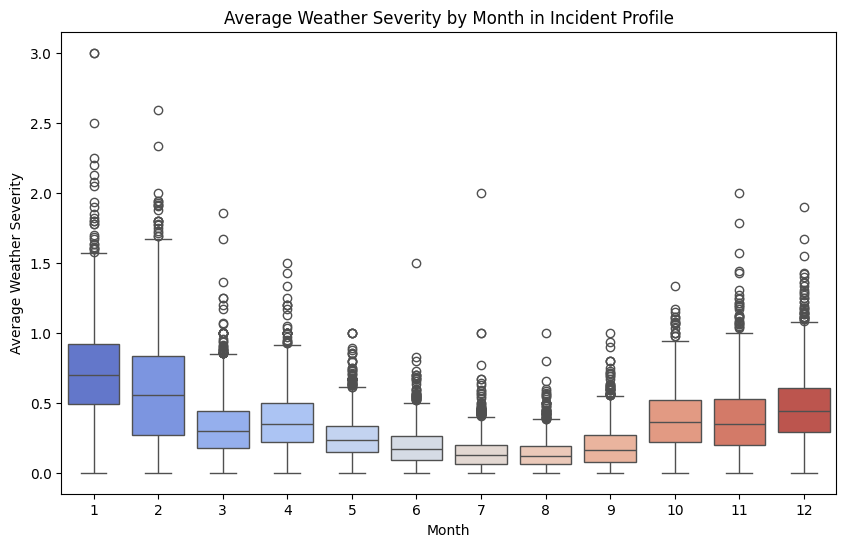

In [51]:
# weather severity w.r.t. month
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="avg_weather_severity", palette="coolwarm")
plt.title("Average Weather Severity by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Average Weather Severity")
plt.show()


### avg_roadway_severity

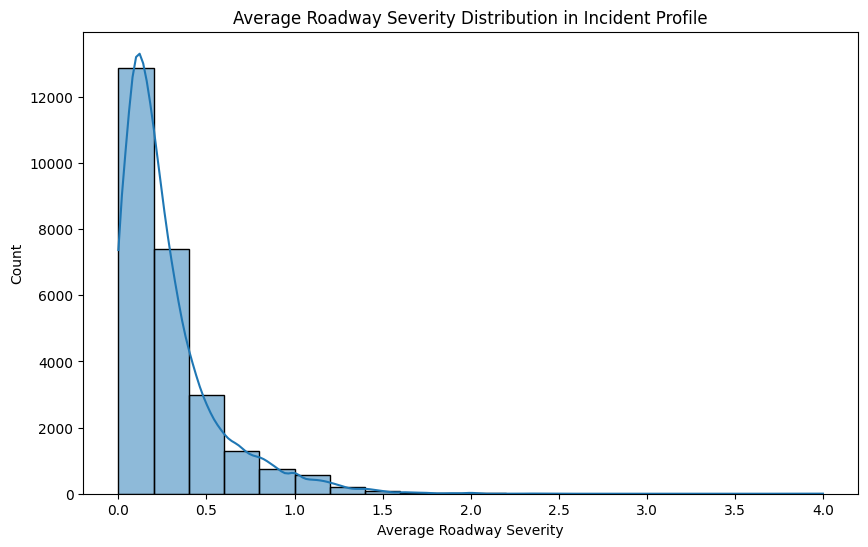

In [52]:
# distribution for avg_roadway_severity
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_roadway_severity"], bins=20, kde=True)
plt.title("Average Roadway Severity Distribution in Incident Profile")
plt.xlabel("Average Roadway Severity")
plt.ylabel("Count")
plt.show()

C:\Users\chucki\AppData\Local\Temp\ipykernel_1176\183883270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="avg_roadway_severity", palette="coolwarm")


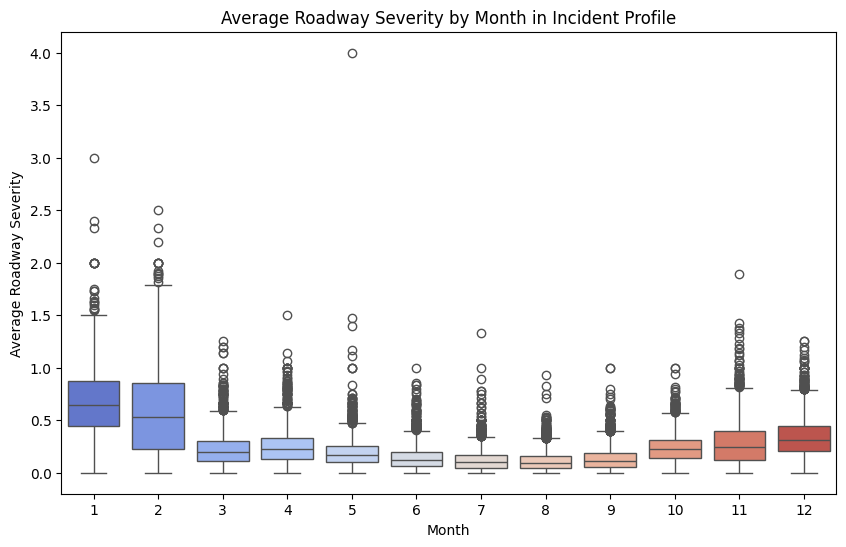

In [53]:
# roadway severity w.r.t. month
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="avg_roadway_severity", palette="coolwarm")
plt.title("Average Roadway Severity by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Average Roadway Severity")
plt.show()


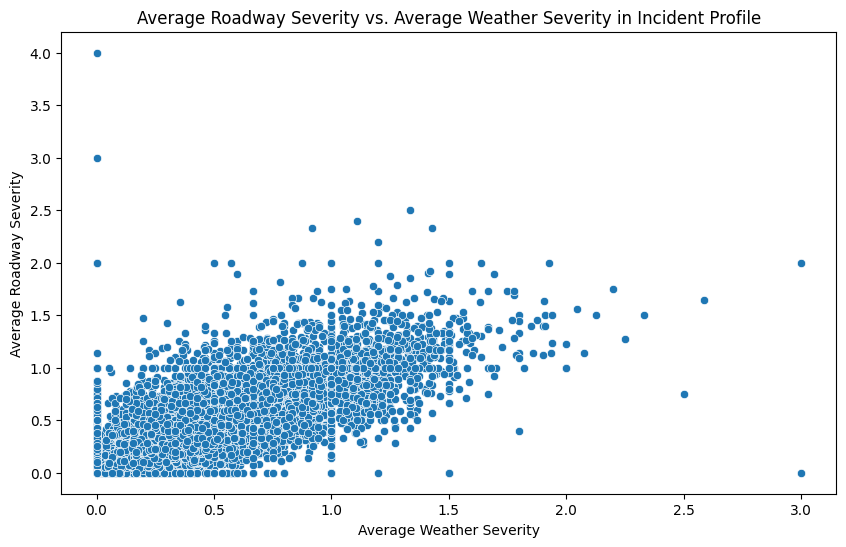

In [54]:
# distribution for avg_roading_severity w.r.t. avg_weather_severity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=incident_profile, x="avg_weather_severity", y="avg_roadway_severity")
plt.title("Average Roadway Severity vs. Average Weather Severity in Incident Profile")
plt.xlabel("Average Weather Severity")
plt.ylabel("Average Roadway Severity")
plt.show()


In [55]:
# correlation between avg_weather_severity and avg_roadway_severity
incident_profile[["avg_weather_severity", "avg_roadway_severity"]].corr()



,avg_weather_severity,avg_roadway_severity
avg_weather_severity,1.000000,0.779972
avg_roadway_severity,0.779972,1.000000


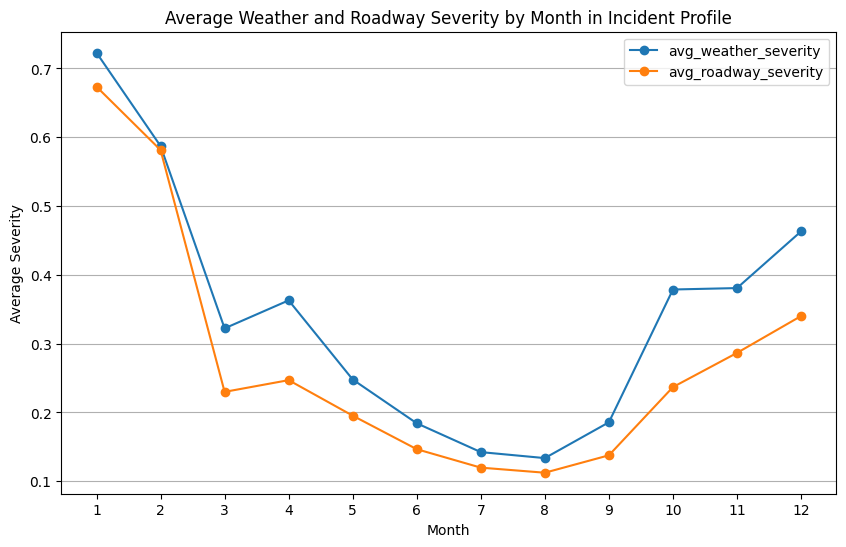

In [56]:
# take the average of these two columns for each month and plot them
weather_roadway_severity = incident_profile.groupby("CRASH_MONTH")[["avg_weather_severity", "avg_roadway_severity"]].mean()
weather_roadway_severity.plot(kind="line", figsize=(10, 6), marker="o")
plt.title("Average Weather and Roadway Severity by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Average Severity")
plt.xticks(range(1, 13))
plt.grid(axis="y")
plt.show()




### avg_lighting_severity, night_crash_rate

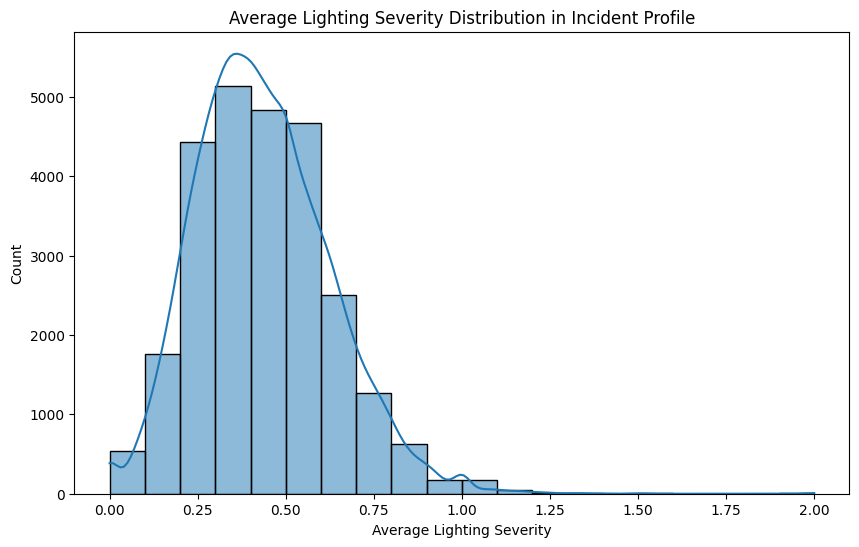

In [57]:
# distribution for avg_lighting_severity
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_lighting_severity"], bins=20, kde=True)
plt.title("Average Lighting Severity Distribution in Incident Profile")
plt.xlabel("Average Lighting Severity")
plt.ylabel("Count")
plt.show()


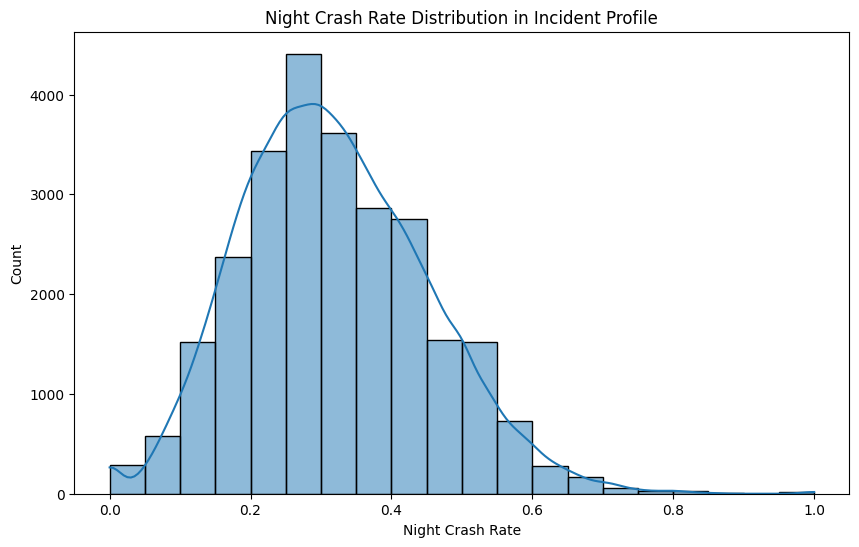

In [58]:
# night_crash_rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["night_crash_rate"], bins=20, kde=True)
plt.title("Night Crash Rate Distribution in Incident Profile")
plt.xlabel("Night Crash Rate")
plt.ylabel("Count")
plt.show()


In [59]:
# correlation between night_crash_rate and avg_lighting_severity
incident_profile[["night_crash_rate", "avg_lighting_severity"]].corr()


,night_crash_rate,avg_lighting_severity
night_crash_rate,1.000000,0.937864
avg_lighting_severity,0.937864,1.000000


---

### adverse_weather_crash_rate

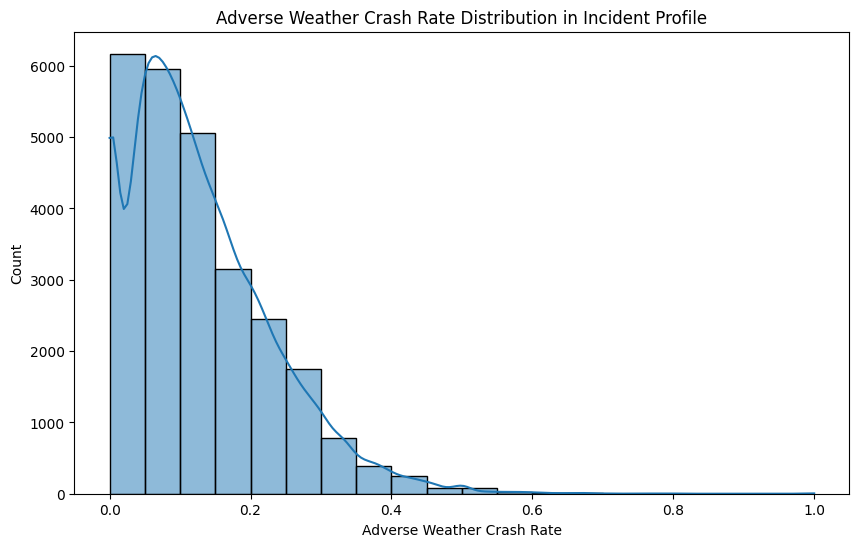

In [60]:
# adverse_weather_crash_rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["adverse_weather_crash_rate"], bins=20, kde=True)
plt.title("Adverse Weather Crash Rate Distribution in Incident Profile")
plt.xlabel("Adverse Weather Crash Rate")
plt.ylabel("Count")
plt.show()

In [61]:
# correlation between adverse_weather_crash_rate and avg_weather_severity
incident_profile[["adverse_weather_crash_rate", "avg_weather_severity"]].corr()

,adverse_weather_crash_rate,avg_weather_severity
adverse_weather_crash_rate,1.000000,0.957067
avg_weather_severity,0.957067,1.000000


C:\Users\chucki\AppData\Local\Temp\ipykernel_1176\2089858169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile_test, x="CRASH_MONTH", y="adverse_weather_crash_rate", palette="coolwarm")


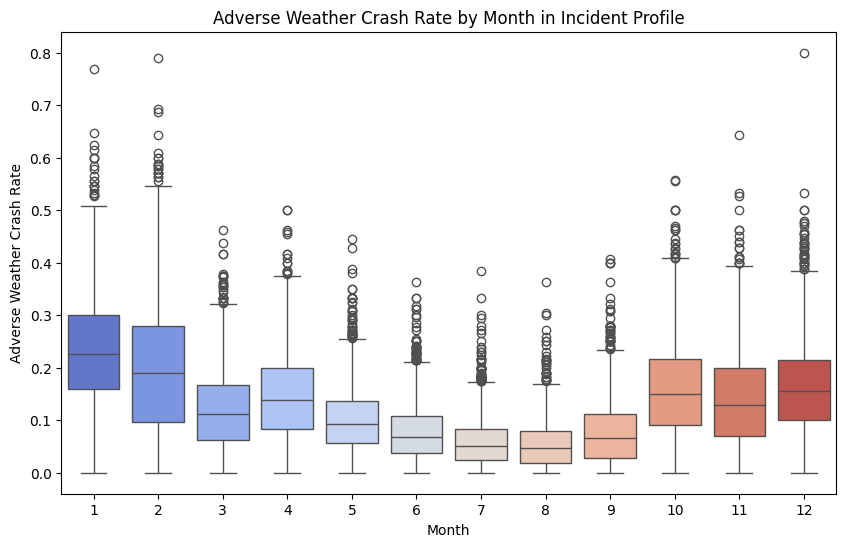

In [62]:

# adverse_weather_crash_rate per month distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile_test, x="CRASH_MONTH", y="adverse_weather_crash_rate", palette="coolwarm")
plt.title("Adverse Weather Crash Rate by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Adverse Weather Crash Rate")
plt.show()

C:\Users\chucki\AppData\Local\Temp\ipykernel_1176\2398517115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="adverse_weather_crash_rate", palette="coolwarm")


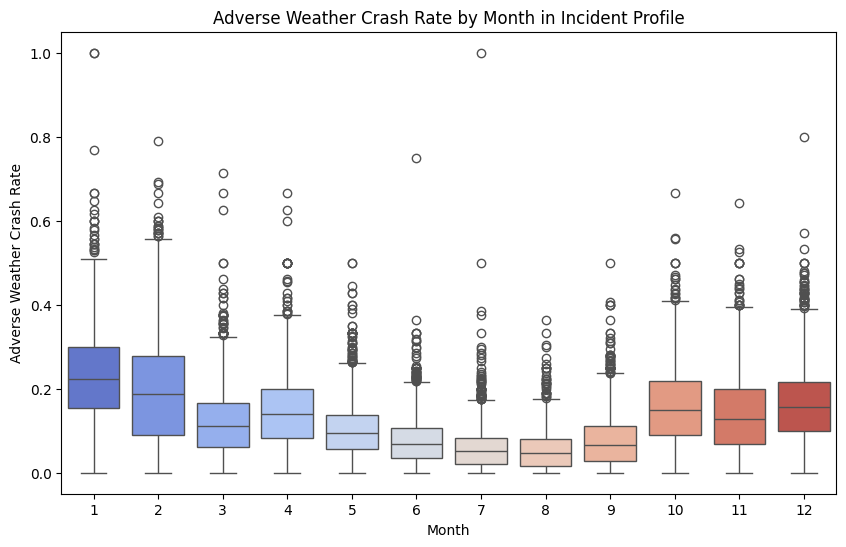

In [63]:
# adverse_weather_crash_rate per month distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="adverse_weather_crash_rate", palette="coolwarm")
plt.title("Adverse Weather Crash Rate by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Adverse Weather Crash Rate")
plt.show()

---

### road_defect_crash_rate

defined as crashes[["ROAD_DEFECT_CATEGORY_BAD", "ROAD_DEFECT_CATEGORY_DEFECT", "ROAD_DEFECT_CATEGORY_DEBRIS"]].sum(axis=1)

the sum of all the crashes with at least one of these categories

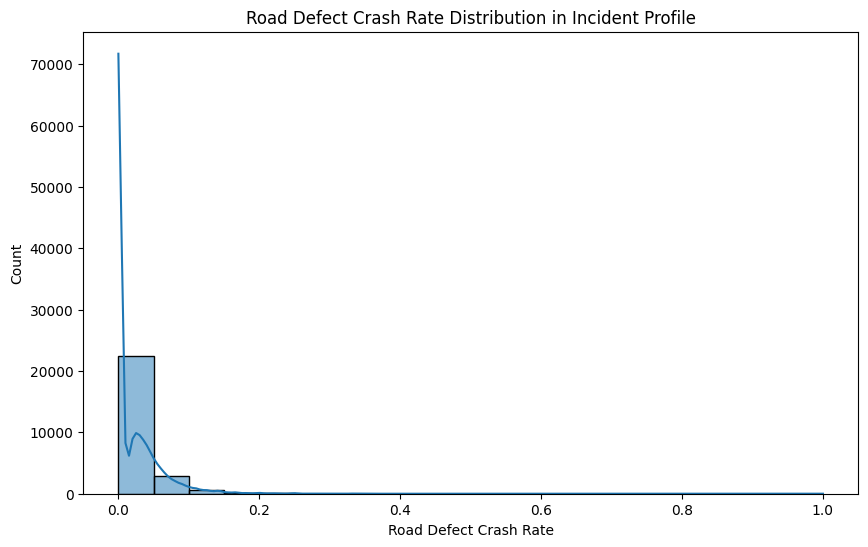

In [64]:
### road_defect_crash_rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["road_defect_crash_rate"], bins=20, kde=True)
plt.title("Road Defect Crash Rate Distribution in Incident Profile")
plt.xlabel("Road Defect Crash Rate")
plt.ylabel("Count")
plt.show()

In [65]:
# correlation between road_defect_crash_rate and avg_roadway_severity
incident_profile[["road_defect_crash_rate", "avg_roadway_severity"]].corr()

,road_defect_crash_rate,avg_roadway_severity
road_defect_crash_rate,1.000000,0.354331
avg_roadway_severity,0.354331,1.000000


---

### speeding_influence

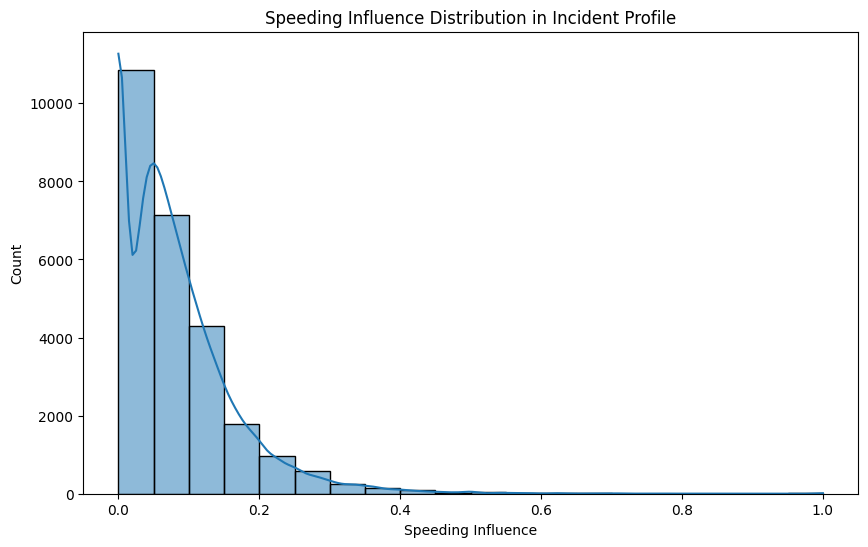

In [66]:
### speeding_influence distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["speeding_influence"], bins=20, kde=True)
plt.title("Speeding Influence Distribution in Incident Profile")
plt.xlabel("Speeding Influence")
plt.ylabel("Count")
plt.show()


C:\Users\chucki\AppData\Local\Temp\ipykernel_1176\375958787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="speeding_influence", palette="coolwarm")


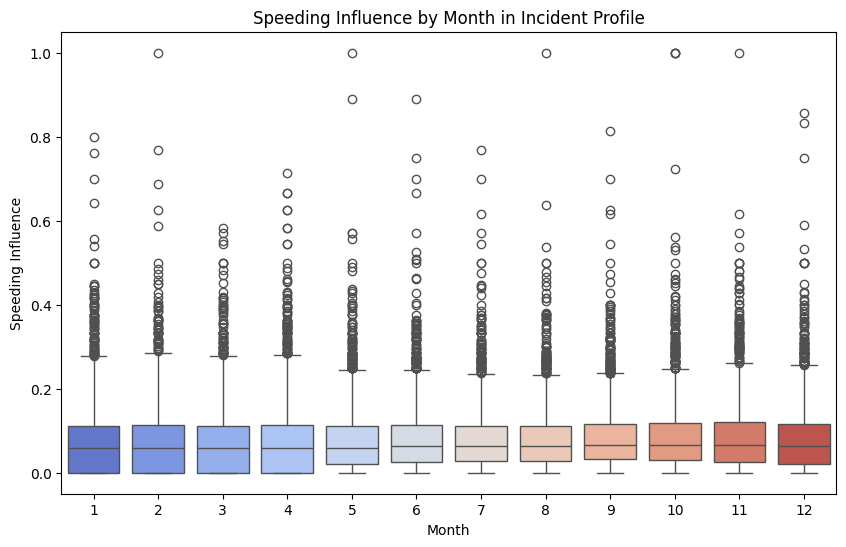

In [67]:
### speeding_influence per month distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="speeding_influence", palette="coolwarm")
plt.title("Speeding Influence by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Speeding Influence")
plt.show()


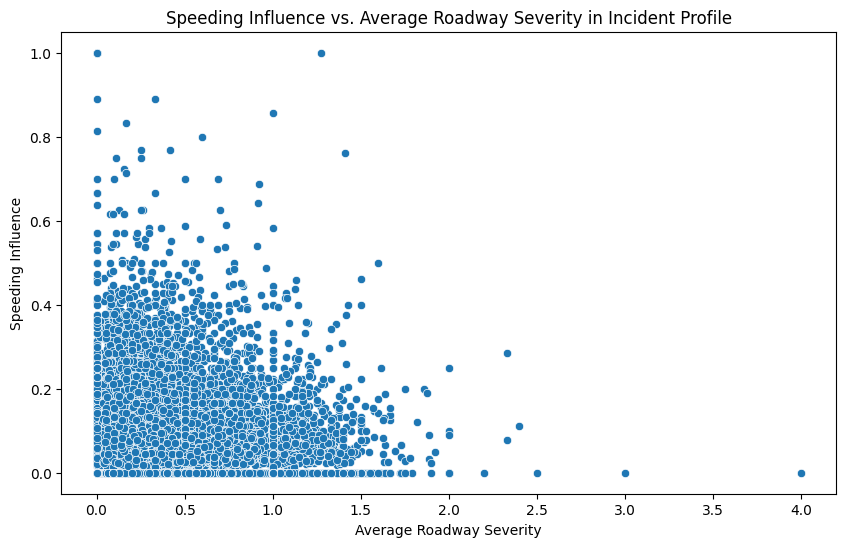

In [68]:
# speeding_influence w.r.t. avg_roadway_severity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=incident_profile, x="avg_roadway_severity", y="speeding_influence")
plt.title("Speeding Influence vs. Average Roadway Severity in Incident Profile")
plt.xlabel("Average Roadway Severity")
plt.ylabel("Speeding Influence")
plt.show()


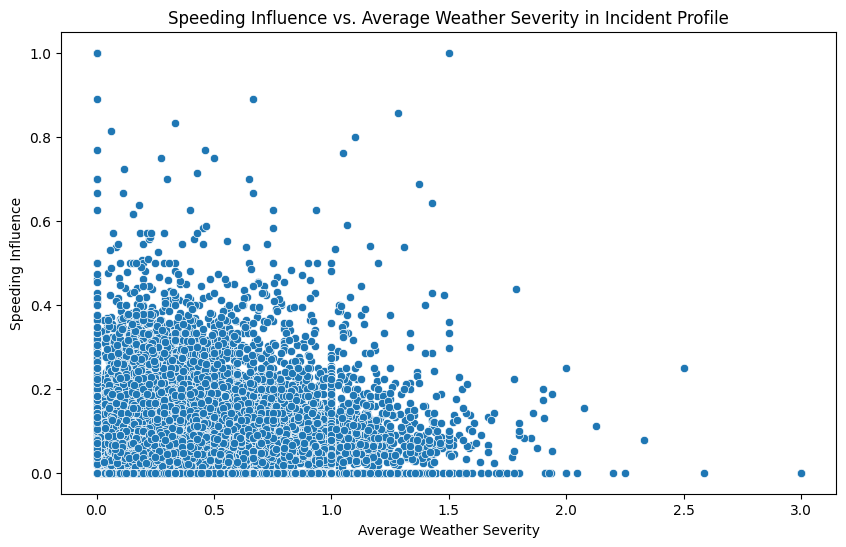

In [69]:
# speeding_influence w.r.t. avg_weather_severity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=incident_profile, x="avg_weather_severity", y="speeding_influence")
plt.title("Speeding Influence vs. Average Weather Severity in Incident Profile")
plt.xlabel("Average Weather Severity")
plt.ylabel("Speeding Influence")
plt.show()


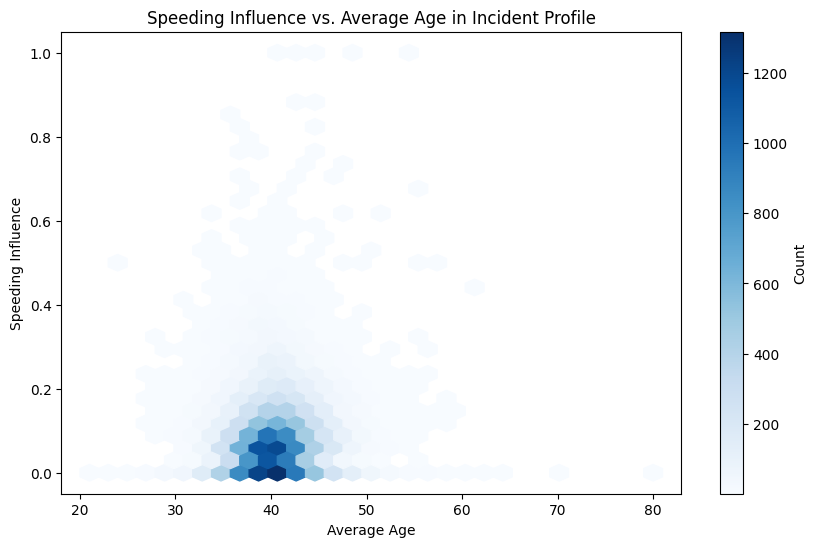

In [70]:
# speeding_influence w.r.t. age
plt.figure(figsize=(10, 6))
plt.hexbin(incident_profile["avg_age"], incident_profile["speeding_influence"], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.title("Speeding Influence vs. Average Age in Incident Profile")
plt.xlabel("Average Age")
plt.ylabel("Speeding Influence")
plt.show()


---

### weekend_crash_rate

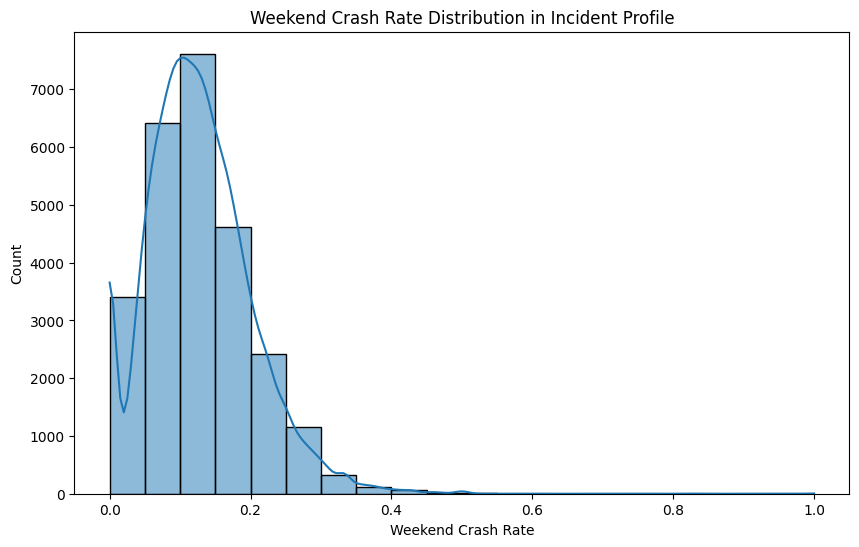

In [72]:
# weekend_crash_rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["weekend_crash_rate"], bins=20, kde=True)
plt.title("Weekend Crash Rate Distribution in Incident Profile")
plt.xlabel("Weekend Crash Rate")
plt.ylabel("Count")
plt.show()

---

### avg_crash_severity_score, injury_severity_score

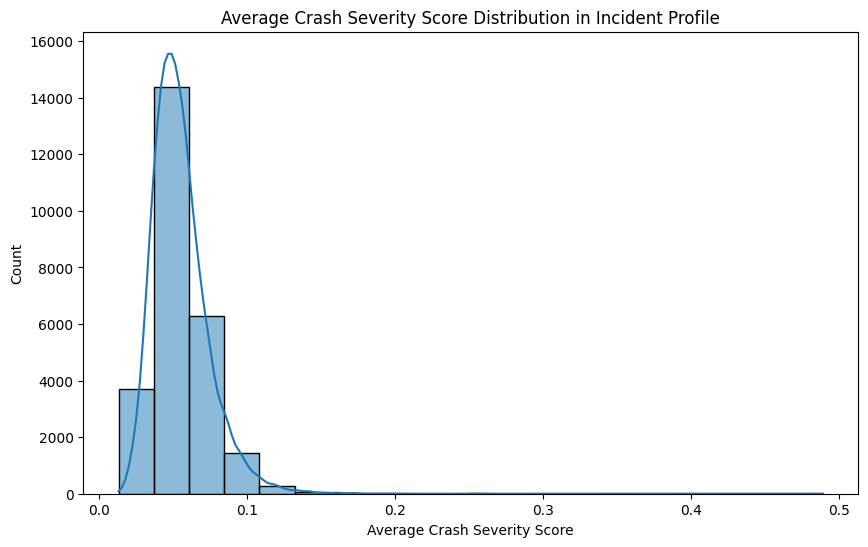

In [73]:
# avg_crash_severity_score distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_crash_severity_score"], bins=20, kde=True)
plt.title("Average Crash Severity Score Distribution in Incident Profile")
plt.xlabel("Average Crash Severity Score")
plt.ylabel("Count")
plt.show()


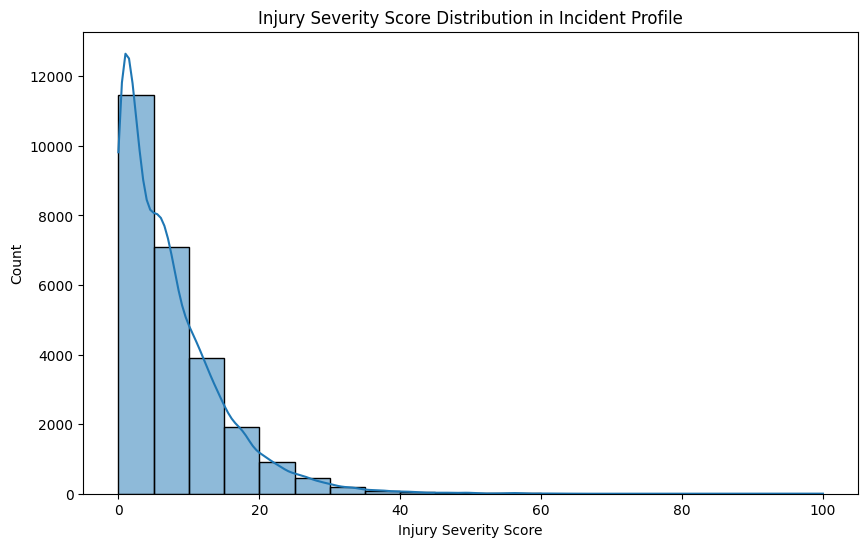

In [74]:
# injury_severity_score
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["injury_severity_score"], bins=20, kde=True)
plt.title("Injury Severity Score Distribution in Incident Profile")
plt.xlabel("Injury Severity Score")
plt.ylabel("Count")
plt.show()

---

In [75]:
incident_profile_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25078 entries, 0 to 26184
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CRASH_YEAR                            25078 non-null  int64  
 1   CRASH_MONTH                           25078 non-null  int64  
 2   BEAT_OF_OCCURRENCE                    25078 non-null  float64
 3   avg_responsibility_score              25075 non-null  float64
 4   avg_weather_severity                  25078 non-null  float64
 5   avg_roadway_severity                  25078 non-null  float64
 6   avg_lighting_severity                 25078 non-null  float64
 7   total_crashes                         25078 non-null  int64  
 8   fatality_rate                         25078 non-null  float64
 9   severe_injury_rate                    25078 non-null  float64
 10  avg_crash_severity_score              25078 non-null  float64
 11  injury_severity_scor

In [76]:
# for avg_responsibility_score, check which BEAT_OF_OCCURRENCE have missing values

incident_profile_test[incident_profile_test['avg_responsibility_score'].isnull()]['BEAT_OF_OCCURRENCE'].value_counts()



BEAT_OF_OCCURRENCE
2024.0    1
314.0     1
724.0     1
Name: count, dtype: int64

In [77]:
# for those BEAT_OF_OCCURRENCE with missing values, fill them with the mean of the same BEAT_OF_OCCURRENCE, same MONTH but different YEAR
incident_profile_test['avg_responsibility_score'] = incident_profile_test.groupby(['BEAT_OF_OCCURRENCE', 'CRASH_MONTH'])['avg_responsibility_score'].transform(lambda x: x.fillna(x.mean()))

incident_profile_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25078 entries, 0 to 26184
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CRASH_YEAR                            25078 non-null  int64  
 1   CRASH_MONTH                           25078 non-null  int64  
 2   BEAT_OF_OCCURRENCE                    25078 non-null  float64
 3   avg_responsibility_score              25078 non-null  float64
 4   avg_weather_severity                  25078 non-null  float64
 5   avg_roadway_severity                  25078 non-null  float64
 6   avg_lighting_severity                 25078 non-null  float64
 7   total_crashes                         25078 non-null  int64  
 8   fatality_rate                         25078 non-null  float64
 9   severe_injury_rate                    25078 non-null  float64
 10  avg_crash_severity_score              25078 non-null  float64
 11  injury_severity_scor

C:\Users\chucki\AppData\Local\Temp\ipykernel_1176\1289273659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_profile_test['avg_responsibility_score'] = incident_profile_test.groupby(['BEAT_OF_OCCURRENCE', 'CRASH_MONTH'])['avg_responsibility_score'].transform(lambda x: x.fillna(x.mean()))


In [78]:
incident_profile_test.to_csv('dataset/incident_profile_95.csv', index=False)